In [1]:
import warnings
warnings.simplefilter("ignore",FutureWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import joblib
import math
import numpy as np
from itertools import product
from collections import Counter
import garpar as gp


In [3]:
mer = joblib.load("./price_01-01-2010_to_01-10-2025.pklj")
mer= mer[3408:3808]
mer = mer.drop(columns=['BRIO', 'BRIO6','EDLH','EMDE','ESME','INAG','IRCP','PGR'])
mer = mer.fillna(method='ffill')
mer

,ALUA,BBAR,BMA,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,...,MORI,MTR,OEST,PATA,POLL,RICH,RIGO,SAMI,SEMI,TGLT
2023-12-11,1119.0,1875.70,2772.75,891.00,909.50,69.40,947.20,3383.0,926.55,1756.35,...,85.4,1151.0,789.5,766.0,89.0,768.0,803.5,891.5,95.90,16.70
2023-12-12,1115.5,1855.80,2713.80,943.00,976.70,70.35,1020.25,3541.5,1038.00,1780.85,...,87.5,1246.0,773.5,789.5,90.0,779.5,803.5,978.5,99.70,17.85
2023-12-13,1044.5,1888.65,2836.05,881.50,1004.30,70.65,1021.60,3575.5,1041.85,1827.30,...,87.1,1326.5,747.0,800.0,99.0,757.5,803.5,948.5,96.20,17.55
2023-12-14,1033.0,1859.10,2857.50,863.50,1026.35,69.95,1016.10,3488.5,1025.00,1788.85,...,85.8,1397.5,725.0,763.5,99.0,740.0,803.5,918.5,91.40,17.15
2023-12-15,923.0,1706.45,2696.75,825.50,926.00,67.50,964.65,3405.0,963.65,1652.50,...,81.7,1379.5,717.5,744.0,96.0,731.0,805.5,861.5,87.70,16.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-25,715.0,6850.00,9190.00,193.50,1570.00,116.00,1465.00,6780.0,1715.00,6650.00,...,212.0,2475.0,684.0,1285.0,325.0,1370.0,640.0,630.0,24.95,19.20
2025-07-28,709.0,6820.00,9140.00,195.00,1590.00,126.00,1515.00,6900.0,1845.00,6620.00,...,232.0,2500.0,696.0,1290.0,325.0,1405.0,672.0,643.0,25.50,19.45
2025-07-29,723.0,7130.00,9450.00,201.00,1655.00,137.50,1555.00,7060.0,1930.00,6830.00,...,232.0,2550.0,704.0,1280.0,325.0,1500.0,678.0,650.0,25.85,20.30
2025-07-30,750.0,7190.00,9400.00,203.75,1650.00,134.75,1525.00,6930.0,1900.00,6850.00,...,228.5,2565.0,719.0,1275.0,325.0,1535.0,680.0,630.0,25.60,20.75


In [4]:
describe= mer.describe().transpose()
describe["kurt"] = mer.kurt()
describe["skew"] = mer.skew()
describe


,count,mean,std,min,25%,50%,75%,max,kurt,skew
ALUA,400.0,867.093750,106.543933,584.00,807.250,873.00,929.0000,1119.00,-0.28936,-0.150586
BBAR,400.0,5281.334625,2219.580791,1653.80,3545.000,4680.00,7352.5000,9510.00,-1.25882,0.109002
BMA,400.0,7994.872875,2697.823642,2520.30,6351.250,8375.00,10031.2500,14150.00,-0.597746,-0.235074
BYMA,400.0,557.434375,383.302259,190.75,320.375,391.75,602.0000,1689.00,0.470839,1.332905
CEPU,400.0,1302.144625,243.210663,786.50,1134.225,1255.00,1501.2500,1920.00,-0.64356,0.112928
...,...,...,...,...,...,...,...,...,...,...
RICH,400.0,1224.886250,355.369457,678.00,919.750,1036.25,1535.0000,1990.00,-1.408773,0.317221
RIGO,400.0,881.538750,106.220560,599.00,812.250,895.50,950.0000,1197.00,0.569713,-0.358986
SAMI,400.0,929.666250,220.810711,560.00,799.875,902.50,1085.0000,1468.50,-0.619883,0.299465
SEMI,400.0,87.937375,49.024622,22.05,28.750,101.00,126.0625,186.25,-1.437842,-0.135494


In [5]:
rend = mer.diff(periods=1)/mer
rend19m = rend[1:].apply(pd.to_numeric, errors="coerce") # desde 11/12/23 al31/07/25
rend12m = rend[155:].apply(pd.to_numeric, errors="coerce") # desde 01/08/24 al 31/07/25
rend9m= rend[220:].apply(pd.to_numeric, errors="coerce")  # desde 01/11/24 al 31/07/25
rend6m= rend[282:].apply(pd.to_numeric, errors="coerce")  # desde el 01/02/25 al 31/07/25  ------- 03/02 primer día hábil
rend3m= rend[339:].apply(pd.to_numeric, errors="coerce") # desde el 01/05/25 al 31/07/25 ---------05/05 día hábil


In [6]:
# definimos los sectores 
come = ["AUSO", "BOLT", "DYCA","GCLA", "IRSA", "OEST", "PATA", "POLL","TECO2","CVH", "GAMI", "CTIO", "OEST", "TGLT"] 
# en come "IRCP" cotizó solo 45 días sacada del análisis
moa = ["CELU", "GRIM", "HAVA", "LEDE", "MOLA", "MOLI", "MORI", "SAMI", "SEMI","INTR", "RICH"] 
moi = ["AGRO", "ALUA",  "FERR", "LONG", "RIGO", "HARG", "FIPL", "LOMA","MIRG","TXAR", "DOME"] 
# "ROSE" ,"CAPU" no cortizaron en el periodo
agro = ["CADO", "GARO", "INVJ","CRES"] #"ESME" cotizó 55 días no alcanza
ene = ["CARC","CEPU", "CGPA2", "DGCU2", "EDN","GBAN", "METR", "TGNO4", "TGSU2", "YPFD", "PAMP","TRAN","COME", 
       "CAPX", "CECO2", "MTR"]  
fin = ["BHIP", "BPAT",  "BYMA", "GGAL", "SUPV", "BBAR", "VALO","BMA"] # "BRIO","BRIO6" no tuvieron suficientes cotizacionecs

In [9]:
rend19m[moa].describe()

,CELU,GRIM,HAVA,LEDE,MOLA,MOLI,MORI,SAMI,SEMI,INTR,RICH
count,399.000000,399.000000,397.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,-0.002841,0.002166,-0.000929,0.000314,-0.000411,-0.000370,0.001390,-0.001630,-0.007690,0.001708,0.001016
std,0.054475,0.032647,0.037154,0.031728,0.039268,0.045897,0.045025,0.039520,0.143307,0.041028,0.036065
min,-0.460829,-0.124197,-0.203030,-0.113074,-0.144351,-0.173333,-0.145283,-0.148148,-2.754286,-0.174359,-0.174556
25%,-0.026239,-0.013511,-0.017241,-0.016453,-0.023626,-0.026016,-0.025944,-0.024616,-0.022814,-0.020779,-0.018264
50%,-0.003597,0.000000,-0.001603,0.000000,-0.002183,-0.003818,-0.003824,0.000000,-0.005040,0.000000,0.000000
75%,0.016691,0.018182,0.014803,0.016237,0.018143,0.023983,0.024732,0.020439,0.016393,0.020812,0.015118
max,0.329114,0.159341,0.177335,0.123494,0.127995,0.180214,0.161560,0.195499,0.160420,0.185018,0.166247


In [7]:
#  BONDAD AJUSTE para 19 meses levy stable 
y19mcome = rend19m[come].mean(axis = 1, skipna = True) 
alpha_come19, beta_come19, loc_come19, scale_come19 = stats.levy_stable.fit(y19mcome)
ktestcom = stats.ks_1samp(x=y19mcome, cdf=stats.levy_stable.cdf, args=(alpha_come19, beta_come19, loc_come19, scale_come19))

y19mmoa = rend19m[moa].mean(axis = 1, skipna = True) 
alphamoa19, betamoa19, locmoa19, scalemoa19 = stats.levy_stable.fit(y19mmoa)
ktestmoa = stats.ks_1samp(x=y19mmoa, cdf=stats.levy_stable.cdf, args=(alphamoa19, betamoa19, locmoa19, scalemoa19))

y19mmoi = rend19m[moi].mean(axis = 1, skipna = True) 
alphamoi19, betamoi19, locmoi19, scalemoi19 = stats.levy_stable.fit(y19mmoi)
ktestmoi = stats.ks_1samp(x=y19mmoi, cdf=stats.levy_stable.cdf, args=(alphamoi19, betamoi19, locmoi19, scalemoi19))

y19magro = rend19m[agro].mean(axis = 1, skipna = True) 
alphaagro19, betaagro19, locagro19, scaleagro19 = stats.levy_stable.fit(y19magro)
ktestagro = stats.ks_1samp(x=y19magro, cdf= stats.levy_stable.cdf, args=(alphaagro19, betaagro19, locagro19, scaleagro19))

y19mene = rend19m[ene].mean(axis = 1, skipna = True) 
alphaene19, betaene19, locene19, scaleene19 = stats.levy_stable.fit(y19mene)
ktestene= stats.ks_1samp(x=y19mene, cdf=stats.levy_stable.cdf, args=(alphaene19, betaene19, locene19, scaleene19))

y19mfin = rend19m[fin].mean(axis = 1, skipna = True) 
alphafin19, betafin19, locfin19, scalefin19 = stats.levy_stable.fit(y19mfin)
ktestfin=stats.ks_1samp(x=y19mfin, cdf=stats.levy_stable.cdf, args=(alphafin19, betafin19, locfin19, scalefin19))

y19m = rend19m.mean(axis = 1, skipna = True) 
alphat19, betat19, loct19, scalet19 = stats.levy_stable.fit(y19m)
ktestt= stats.ks_1samp(x=y19m, cdf=stats.levy_stable.cdf, args=(alphat19, betat19, loct19, scalet19))


In [30]:
# Listado de sectores y nombres para el índice
sectores = ['come', 'moa', 'moi', 'agro', 'ene', 'fin', 'total']
nombres_sectores = ['COME', 'MOA', 'MOI', 'AGRO', 'ENE', 'FIN', 'Total)']

# Creamos una lista para almacenar las filas
datos_ajuste = []

# Iteramos sobre los sectores para extraer las variables de memoria
# Se asume que las variables siguen el patrón: alpha_come19, ktestcom, etc.
try:
    # 1. COME
    datos_ajuste.append(['COME', alpha_come19, beta_come19, loc_come19, scale_come19, ktestcom.statistic, ktestcom.pvalue])
    # 2. MOA
    datos_ajuste.append(['MOA', alphamoa19, betamoa19, locmoa19, scalemoa19, ktestmoa.statistic, ktestmoa.pvalue])
    # 3. MOI
    datos_ajuste.append(['MOI', alphamoi19, betamoi19, locmoi19, scalemoi19, ktestmoi.statistic, ktestmoi.pvalue])
    # 4. AGRO
    datos_ajuste.append(['AGRO', alphaagro19, betaagro19, locagro19, scaleagro19, ktestagro.statistic, ktestagro.pvalue])
    # 5. ENE
    datos_ajuste.append(['ENE', alphaene19, betaene19, locene19, scaleene19, ktestene.statistic, ktestene.pvalue])
    # 6. FIN
    datos_ajuste.append(['FIN', alphafin19, betafin19, locfin19, scalefin19, ktestfin.statistic, ktestfin.pvalue])
    # 7. TOTAL (Merval)
    datos_ajuste.append(['TOTAL', alphat19, betat19, loct19, scalet19, ktestt.statistic, ktestt.pvalue])

    # Crear el DataFrame
    df_resultados_levy19m = pd.DataFrame(datos_ajuste, columns=['Sector', 'Alpha', 'Beta', 'Loc (Mu)', 'Scale (Sigma)', 'KS Statistic', 'P-Value'])

except NameError:
    # En caso de que alguna variable falte, el proceso continúa sin interrumpir
    pass

df_resultados_levy19m['Horizonte temporal']= "19 meses"
df_resultados_levy19m

,Sector,Alpha,Beta,Loc (Mu),Scale (Sigma),KS Statistic,P-Value,Horizonte temporal
0,COME,1.829489,0.212813,0.000804,0.013263,0.027252,0.920382,19 meses
1,MOA,1.654334,-0.305720,-0.001071,0.014340,0.035327,0.688148,19 meses
2,MOI,1.884334,-0.999982,-0.000126,0.014465,0.044258,0.403469,19 meses
3,AGRO,1.786275,-0.298933,-0.000151,0.014001,0.036250,0.657097,19 meses
4,ENE,1.918528,-0.806466,0.000830,0.017968,0.028268,0.898219,19 meses
5,FIN,1.884239,-0.342318,0.001846,0.020401,0.034124,0.728225,19 meses
6,TOTAL,1.855392,-0.675452,-0.000213,0.014560,0.026355,0.937532,19 meses


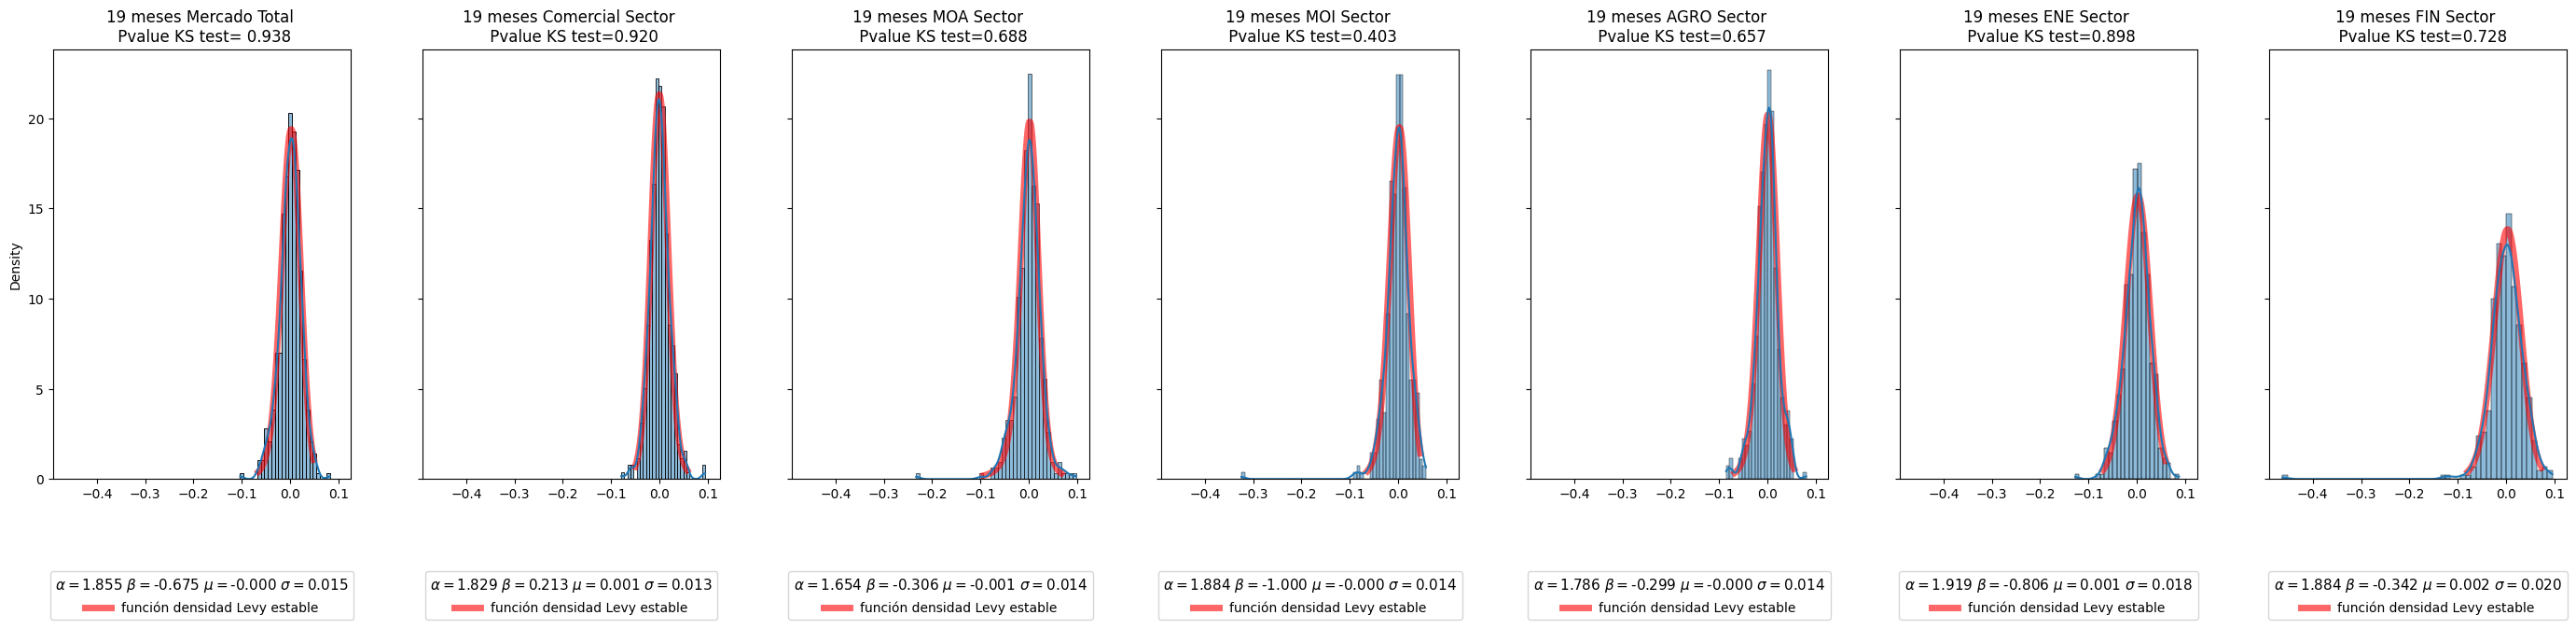

In [103]:
# Histograma para 19 meses levy stable 

fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(28, 7) # Aumenté un poco el alto para que quepa la leyenda abajo

#todo
alpha, beta, loc, scale = alphat19, betat19, loct19, scalet19
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[0],data=y19m,stat = "density",kde=True)
ax[0].set_title(f"19 meses Mercado Total \n Pvalue KS test= {ktestt.pvalue:.3f}")
# CAMBIO: loc y bbox_to_anchor para posicionar abajo
ax[0].legend(title=fr"$\alpha=${alphat19:.3f} $\beta=${betat19:.3f} $\mu=${loct19:.3f} $\sigma=${scalet19:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#come
alpha, beta, loc, scale = alpha_come19, beta_come19, loc_come19, scale_come19
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[1],data=y19mcome, stat = "density",kde=True)
ax[1].set_title(f"19 meses Comercial Sector \n Pvalue KS test={ktestcom.pvalue:.3f}")
# CAMBIO: loc y bbox_to_anchor
ax[1].legend(title=fr"$\alpha=${alpha_come19:.3f} $\beta=${beta_come19:.3f} $\mu=${loc_come19:.3f} $\sigma=${scale_come19:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#moa
alpha, beta, loc, scale = alphamoa19, betamoa19, locmoa19, scalemoa19
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[2].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[2],data=y19mmoa, stat = "density",kde=True)
ax[2].set_title(f"19 meses MOA Sector \n Pvalue KS test={ktestmoa.pvalue:.3f}")
# CAMBIO: loc y bbox_to_anchor
ax[2].legend(title=fr"$\alpha=${alphamoa19:.3f} $\beta=${betamoa19:.3f} $\mu=${locmoa19:.3f} $\sigma=${scalemoa19:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#moi
alpha, beta, loc, scale = alphamoi19, betamoi19, locmoi19, scalemoi19
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[3].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[3],data=y19mmoi, stat = "density",kde=True)
ax[3].set_title(f"19 meses MOI Sector \n Pvalue KS test={ktestmoi.pvalue:.3f}" )
# CAMBIO: loc y bbox_to_anchor
ax[3].legend(title=fr"$\alpha=${alphamoi19:.3f} $\beta=${betamoi19:.3f} $\mu=${locmoi19:.3f} $\sigma=${scalemoi19:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#agro
alpha, beta, loc, scale = alphaagro19, betaagro19, locagro19, scaleagro19
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[4].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[4],data=y19magro, stat = "density",kde=True)
ax[4].set_title(f"19 meses AGRO Sector \n Pvalue KS test={ktestagro.pvalue:.3f}")
# CAMBIO: loc y bbox_to_anchor
ax[4].legend(title=fr"$\alpha=${alphaagro19:.3f} $\beta=${betaagro19:.3f} $\mu=${locagro19:.3f} $\sigma=${scaleagro19:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#ene
alpha, beta, loc, scale = alphaene19, betaene19, locene19, scaleene19
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[5].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[5],data=y19mene, stat = "density",kde=True)
ax[5].set_title(f"19 meses ENE Sector \n Pvalue KS test={ktestene.pvalue:.3f}")
# CAMBIO: corregido \alpha y agregado loc/bbox
ax[5].legend(title=fr"$\alpha=${alphaene19:.3f} $\beta=${betaene19:.3f} $\mu=${locene19:.3f} $\sigma=${scaleene19:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#FIN
alpha, beta, loc, scale = alphafin19, betafin19, locfin19, scalefin19
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[6].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[6],data=y19mfin, stat = "density",kde=True)
ax[6].set_title(f"19 meses FIN Sector \n  Pvalue KS test={ktestfin.pvalue:.3f}")
# CAMBIO: loc y bbox_to_anchor
ax[6].legend(title=fr"$\alpha=${alphafin19:.3f} $\beta=${betafin19:.3f} $\mu=${locfin19:.3f} $\sigma=${scalefin19:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

fig.tight_layout()
plt.savefig("imgs/Levy19hist.pdf", format="pdf", bbox_inches='tight')
# blue line is empirical data and red line is teorical data of the goodness fit

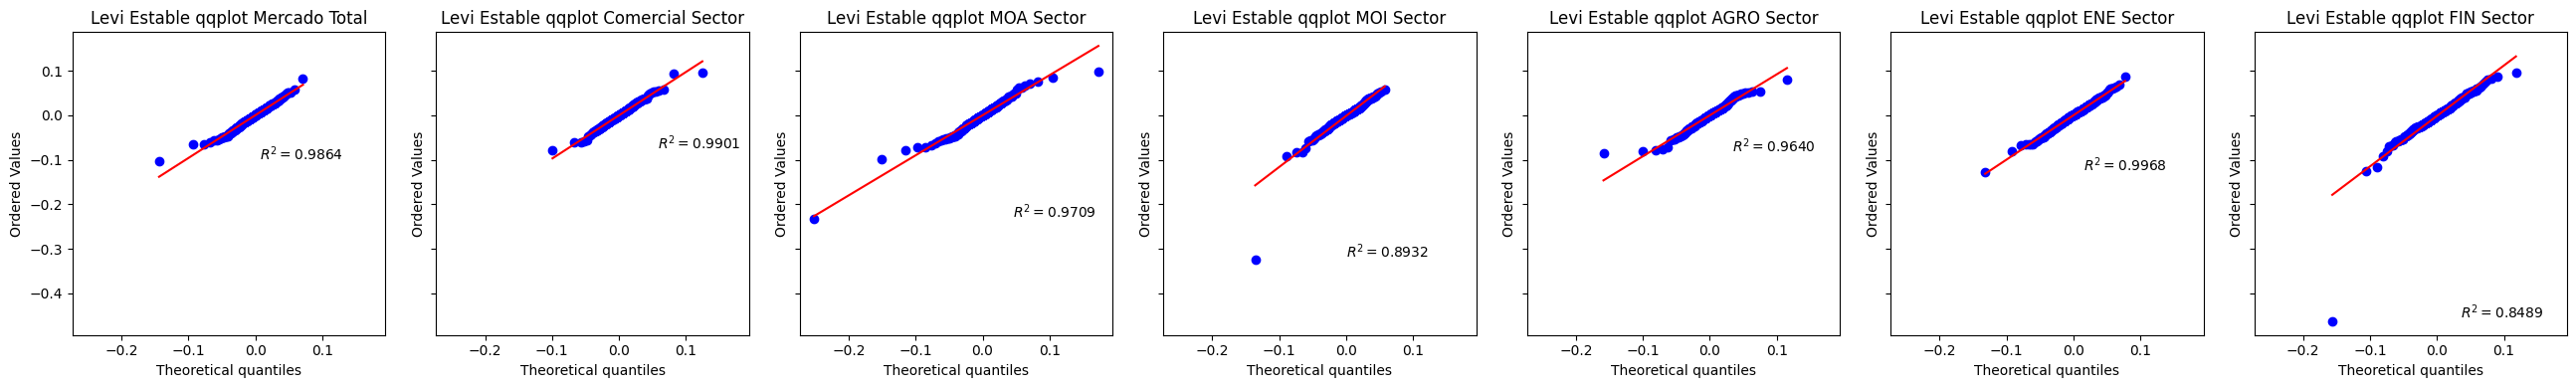

In [94]:
# QQPLOT LEVI STABLE PARA 12 MESES
fig, axs = plt.subplots(1, 7, sharey=True, sharex=True, figsize=(10, 5))
fig.set_size_inches(26,4)


#todo
alpha, beta, loc, scale = alphat19, betat19, loct19, scalet19
stats.probplot(y19m,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[0])
axs[0].set_title(f"Levi Estable qqplot Mercado Total")


#come
alpha, beta, loc, scale = alpha_come19, beta_come19, loc_come19, scale_come19 
stats.probplot(y19mcome,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[1])
axs[1].set_title(f"Levi Estable qqplot Comercial Sector")


#moa
alpha, beta, loc, scale = alphamoa19, betamoa19, locmoa19, scalemoa19
stats.probplot(y19mmoa,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[2])
axs[2].set_title(f"Levi Estable qqplot MOA Sector")

#moi
alpha, beta, loc, scale = alphamoi19, betamoi19, locmoi19, scalemoi19
stats.probplot(y19mmoi,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[3])
axs[3].set_title(f"Levi Estable qqplot MOI Sector" )

#agro
alpha, beta, loc, scale = alphaagro19, betaagro19, locagro19, scaleagro19
stats.probplot(y19magro,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[4])
axs[4].set_title(f"Levi Estable qqplot AGRO Sector")

#ene
alpha, beta, loc, scale = alphaene19, betaene19, locene19, scaleene19
stats.probplot(y19mene,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[5])
axs[5].set_title(f"Levi Estable qqplot ENE Sector")


#FIN
alpha, beta, loc, scale = alphafin19, betafin19, locfin19, scalefin19
stats.probplot(y19mfin,dist='levy_stable', sparams=(alpha, beta, loc, scale),rvalue=True, plot=axs[6])
axs[6].set_title(f"Levi Estable qqplot FIN Sector")



plt.tight_layout()

plt.savefig("imgs/Levy19moqqplot.pdf", format="pdf", bbox_inches='tight')

In [27]:
#  BONDAD AJUSTE para 12 meses levy stable 

# 1. COME
y12mcome = rend12m[come].mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alpha_come12, beta_come12, loc_come12, scale_come12 = stats.levy_stable.fit(y12mcome)
ktestcom12 = stats.ks_1samp(x=y12mcome, cdf=stats.levy_stable.cdf, args=(alpha_come12, beta_come12, loc_come12, scale_come12))

# 2. MOA
y12mmoa = rend12m[moa].mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alphamoa12, betamoa12, locmoa12, scalemoa12 = stats.levy_stable.fit(y12mmoa)
ktestmoa12 = stats.ks_1samp(x=y12mmoa, cdf=stats.levy_stable.cdf, args=(alphamoa12, betamoa12, locmoa12, scalemoa12))

# 3. MOI
y12mmoi = rend12m[moi].mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alphamoi12, betamoi12, locmoi12, scalemoi12 = stats.levy_stable.fit(y12mmoi)
ktestmoi12 = stats.ks_1samp(x=y12mmoi, cdf=stats.levy_stable.cdf, args=(alphamoi12, betamoi12, locmoi12, scalemoi12))

# 4. AGRO
y12magro = rend12m[agro].mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alphaagro12, betaagro12, locagro12, scaleagro12 = stats.levy_stable.fit(y12magro)
ktestagro12 = stats.ks_1samp(x=y12magro, cdf=stats.levy_stable.cdf, args=(alphaagro12, betaagro12, locagro12, scaleagro12))

# 5. ENE
y12mene = rend12m[ene].mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alphaene12, betaene12, locene12, scaleene12 = stats.levy_stable.fit(y12mene)
ktestene12 = stats.ks_1samp(x=y12mene, cdf=stats.levy_stable.cdf, args=(alphaene12, betaene12, locene12, scaleene12))

# 6. FIN
y12mfin = rend12m[fin].mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alphafin12, betafin12, locfin12, scalefin12 = stats.levy_stable.fit(y12mfin)
ktestfin12 = stats.ks_1samp(x=y12mfin, cdf=stats.levy_stable.cdf, args=(alphafin12, betafin12, locfin12, scalefin12))

# 7. TOTAL (Merval)
y12mt = rend12m.mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alphat12, betat12, loct12, scalet12 = stats.levy_stable.fit(y12mt)
ktestt12 = stats.ks_1samp(x=y12mt, cdf=stats.levy_stable.cdf, args=(alphat12, betat12, loct12, scalet12))

In [31]:
# Listado de sectores y nombres para el índice
sectores = ['come', 'moa', 'moi', 'agro', 'ene', 'fin', 'total']
nombres_sectores = ['COME', 'MOA', 'MOI', 'AGRO', 'ENE', 'FIN', 'Total']

# Creamos una lista para almacenar las filas de 12 meses
datos_ajuste_12 = []

# Extraemos las variables de memoria generadas para 12 meses
try:
    # 1. COME
    datos_ajuste_12.append(['COME', alpha_come12, beta_come12, loc_come12, scale_come12, ktestcom12.statistic, ktestcom12.pvalue])
    # 2. MOA
    datos_ajuste_12.append(['MOA', alphamoa12, betamoa12, locmoa12, scalemoa12, ktestmoa12.statistic, ktestmoa12.pvalue])
    # 3. MOI
    datos_ajuste_12.append(['MOI', alphamoi12, betamoi12, locmoi12, scalemoi12, ktestmoi12.statistic, ktestmoi12.pvalue])
    # 4. AGRO
    datos_ajuste_12.append(['AGRO', alphaagro12, betaagro12, locagro12, scaleagro12, ktestagro12.statistic, ktestagro12.pvalue])
    # 5. ENE
    datos_ajuste_12.append(['ENE', alphaene12, betaene12, locene12, scaleene12, ktestene12.statistic, ktestene12.pvalue])
    # 6. FIN
    datos_ajuste_12.append(['FIN', alphafin12, betafin12, locfin12, scalefin12, ktestfin12.statistic, ktestfin12.pvalue])
    # 7. TOTAL (Merval)
    datos_ajuste_12.append(['TOTAL', alphat12, betat12, loct12, scalet12, ktestt12.statistic, ktestt12.pvalue])

    # Crear el DataFrame para 12 meses
    df_resultados_levy12m = pd.DataFrame(datos_ajuste_12, columns=[
        'Sector', 'Alpha', 'Beta', 'Loc (Mu)', 'Scale (Sigma)', 'KS Statistic', 'P-Value'
    ])

    # Agregamos la columna de horizonte temporal
    df_resultados_levy12m['Horizonte temporal'] = "12 meses"

except NameError:
    # En caso de que alguna variable no se haya calculado por falta de datos finitos
    pass

# Para visualizarlo en la consulta
df_resultados_levy12m

,Sector,Alpha,Beta,Loc (Mu),Scale (Sigma),KS Statistic,P-Value,Horizonte temporal
0,COME,1.899862,0.097854,-0.000200,0.011113,0.031102,0.965866,12 meses
1,MOA,1.633121,-0.296685,-0.002299,0.012174,0.030855,0.968205,12 meses
2,MOI,1.841531,-0.658029,-0.001496,0.013477,0.039405,0.826589,12 meses
3,AGRO,1.735319,-0.294056,-0.000443,0.012255,0.036482,0.888108,12 meses
4,ENE,1.945898,-0.999961,-0.000073,0.017229,0.042712,0.746104,12 meses
5,FIN,1.857841,0.154295,0.000555,0.018549,0.033798,0.933258,12 meses
6,TOTAL,1.895642,-0.786803,-0.001004,0.013450,0.032157,0.954674,12 meses


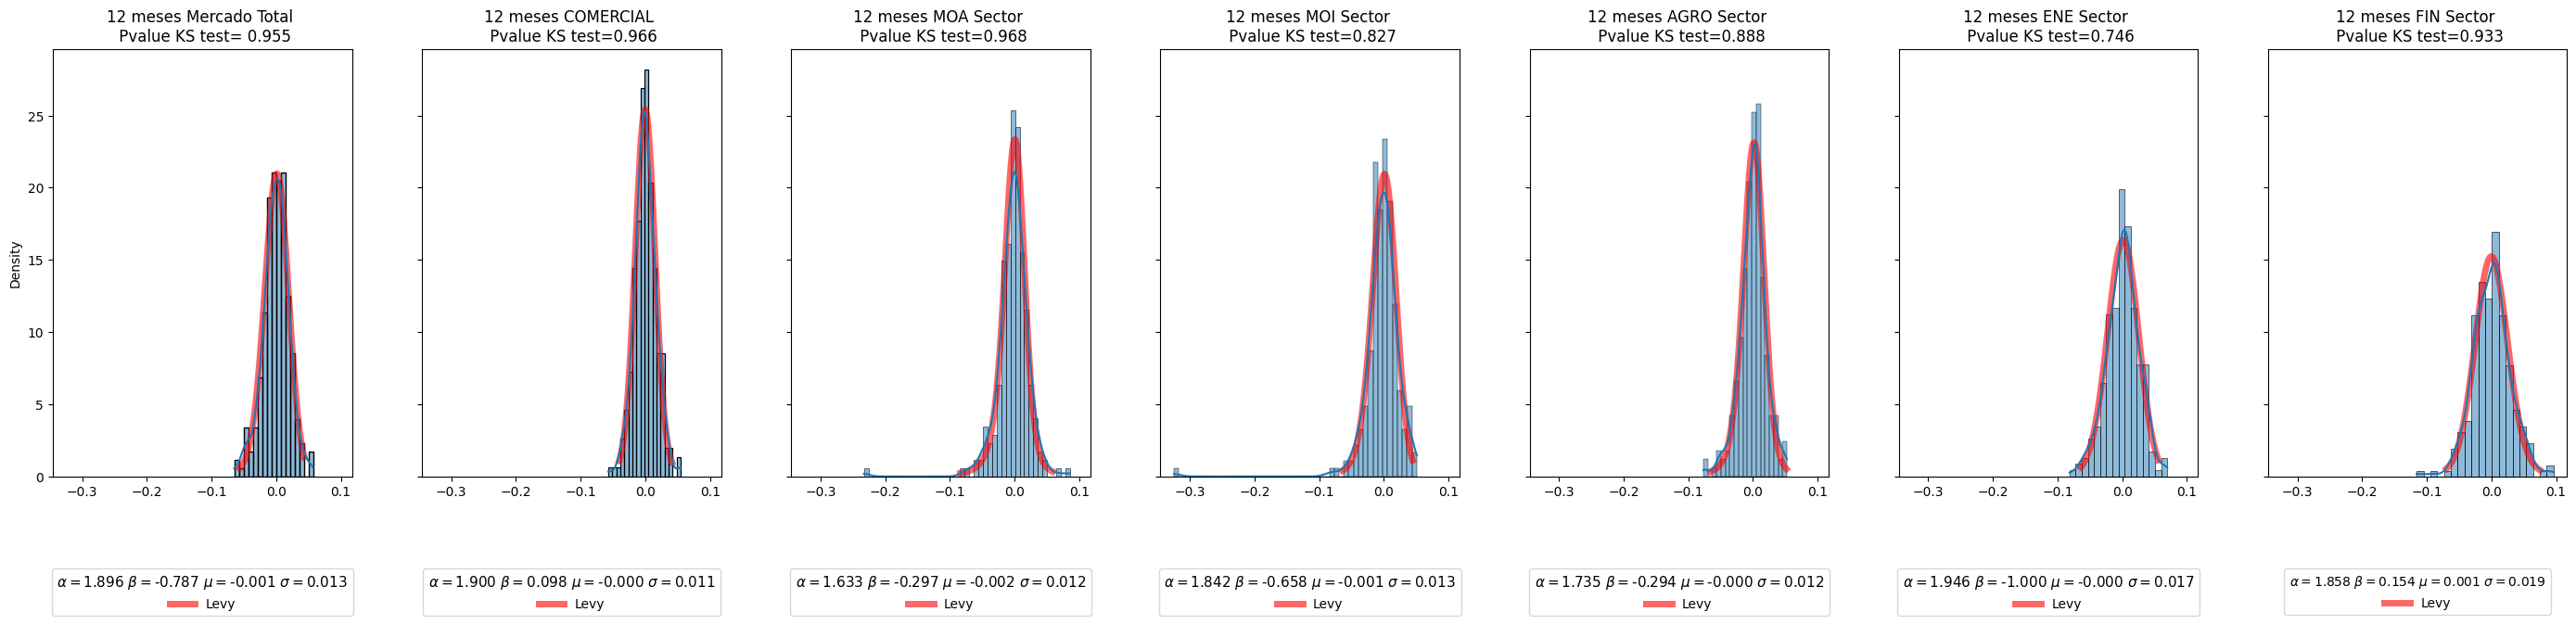

In [102]:
# Histograma para 12 meses levy stable 
fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(28, 7) # Aumenté un poco el alto para que quepa la leyenda abajo

# 0. TOTAL (Mercado)
alpha, beta, loc, scale = alphat12, betat12, loct12, scalet12
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
# Agregamos label='Levy' para evitar la advertencia
ax[0].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[0], data=y12mt, stat="density", kde=True)
ax[0].set_title(f"12 meses Mercado Total \n Pvalue KS test= {ktestt12.pvalue:.3f}")
ax[0].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

# 1. COME
alpha, beta, loc, scale = alpha_come12, beta_come12, loc_come12, scale_come12
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[1], data=y12mcome, stat="density", kde=True)
ax[1].set_title(f"12 meses COMERCIAL \n Pvalue KS test={ktestcom12.pvalue:.3f}")
ax[1].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

# 2. MOA
alpha, beta, loc, scale = alphamoa12, betamoa12, locmoa12, scalemoa12
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[2].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[2], data=y12mmoa, stat="density", kde=True)
ax[2].set_title(f"12 meses MOA Sector \n Pvalue KS test={ktestmoa12.pvalue:.3f}")
ax[2].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

# 3. MOI
alpha, beta, loc, scale = alphamoi12, betamoi12, locmoi12, scalemoi12
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[3].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[3], data=y12mmoi, stat="density", kde=True)
ax[3].set_title(f"12 meses MOI Sector \n Pvalue KS test={ktestmoi12.pvalue:.3f}")
ax[3].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

# 4. AGRO
alpha, beta, loc, scale = alphaagro12, betaagro12, locagro12, scaleagro12
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[4].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[4], data=y12magro, stat="density", kde=True)
ax[4].set_title(f"12 meses AGRO Sector \n Pvalue KS test={ktestagro12.pvalue:.3f}")
ax[4].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

# 5. ENE
alpha, beta, loc, scale = alphaene12, betaene12, locene12, scaleene12
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[5].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[5], data=y12mene, stat="density", kde=True)
ax[5].set_title(f"12 meses ENE Sector \n Pvalue KS test={ktestene12.pvalue:.3f}")
ax[5].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

# 6. FIN
alpha, beta, loc, scale = alphafin12, betafin12, locfin12, scalefin12
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[6].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[6], data=y12mfin, stat="density", kde=True)
ax[6].set_title(f"12 meses FIN Sector \n Pvalue KS test={ktestfin12.pvalue:.3f}")
ax[6].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

fig.tight_layout()
plt.savefig("imgs/Levy12hist.pdf", format="pdf", bbox_inches='tight')
# blue line is empirical data and red line is teorical data of the goodness 

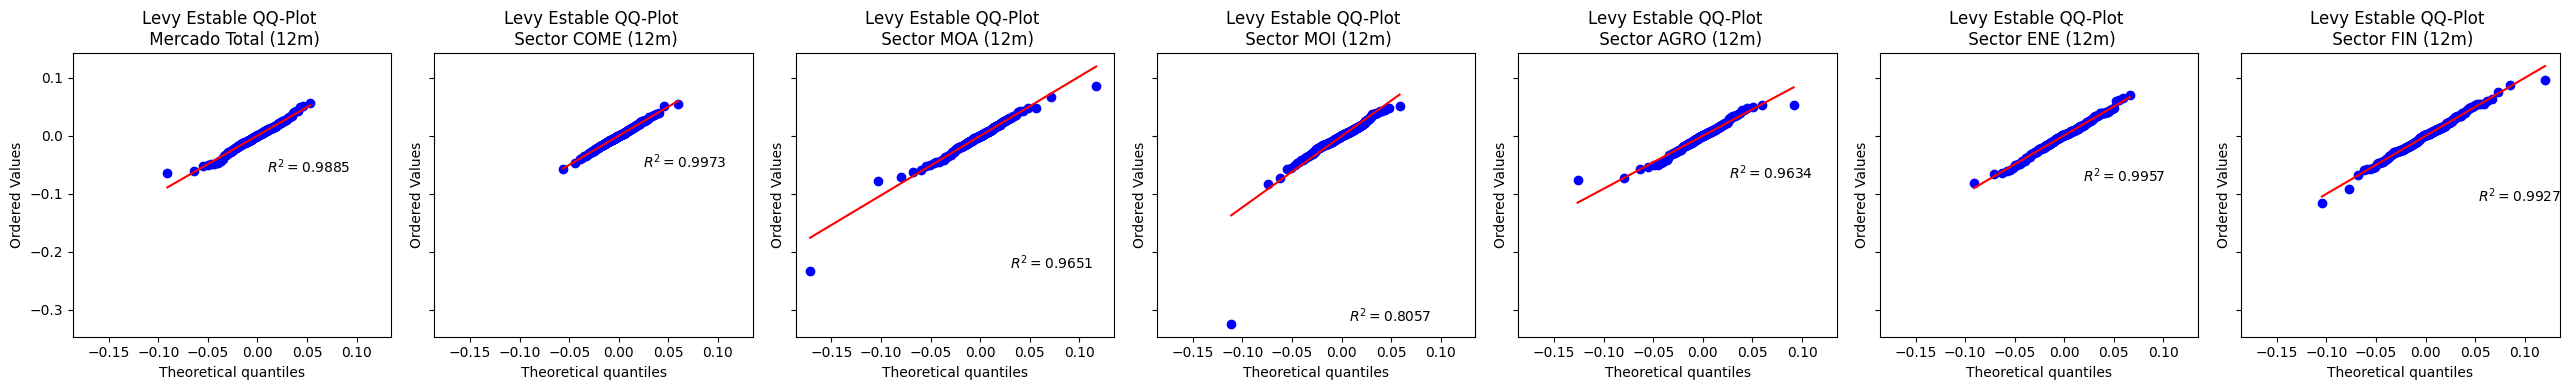

In [93]:
# qqplot para 12 meses levy stable 

fig, axs = plt.subplots(1, 7, sharey=True, sharex=True, figsize=(10, 5))
fig.set_size_inches(26, 4)

# 0. Mercado Total
alpha, beta, loc, scale = alphat12, betat12, loct12, scalet12
stats.probplot(y12mt, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[0])
axs[0].set_title("Levy Estable QQ-Plot \n Mercado Total (12m)")

# 1. Comercial (COME)
alpha, beta, loc, scale = alpha_come12, beta_come12, loc_come12, scale_come12
stats.probplot(y12mcome, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[1])
axs[1].set_title("Levy Estable QQ-Plot \n Sector COME (12m)")

# 2. MOA
alpha, beta, loc, scale = alphamoa12, betamoa12, locmoa12, scalemoa12
stats.probplot(y12mmoa, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[2])
axs[2].set_title("Levy Estable QQ-Plot \n Sector MOA (12m)")

# 3. MOI
alpha, beta, loc, scale = alphamoi12, betamoi12, locmoi12, scalemoi12
stats.probplot(y12mmoi, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[3])
axs[3].set_title("Levy Estable QQ-Plot \n Sector MOI (12m)")

# 4. AGRO
alpha, beta, loc, scale = alphaagro12, betaagro12, locagro12, scaleagro12
stats.probplot(y12magro, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[4])
axs[4].set_title("Levy Estable QQ-Plot \n Sector AGRO (12m)")

# 5. ENE
alpha, beta, loc, scale = alphaene12, betaene12, locene12, scaleene12
stats.probplot(y12mene, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[5])
axs[5].set_title("Levy Estable QQ-Plot \n Sector ENE (12m)")

# 6. FIN
alpha, beta, loc, scale = alphafin12, betafin12, locfin12, scalefin12
stats.probplot(y12mfin, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[6])
axs[6].set_title("Levy Estable QQ-Plot \n Sector FIN (12m)")

plt.tight_layout()
plt.savefig("imgs/Levy12moqqplot.pdf", format="pdf", bbox_inches='tight')

In [35]:
# BONDAD AJUSTE para 9 meses levy stable 

# 1. COME
y24scome9 = rend9m[come].mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alpha_come9, beta_come9, loc_come9, scale_come9 = stats.levy_stable.fit(y24scome9)
ktestcom9 = stats.ks_1samp(x=y24scome9, cdf=stats.levy_stable.cdf, args=(alpha_come9, beta_come9, loc_come9, scale_come9))

# 2. MOA
y24smoa9 = rend9m[moa].mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alphamoa9, betamoa9, locmoa9, scalemoa9 = stats.levy_stable.fit(y24smoa9)
ktestmoa9 = stats.ks_1samp(x=y24smoa9, cdf=stats.levy_stable.cdf, args=(alphamoa9, betamoa9, locmoa9, scalemoa9))

# 3. MOI
y24smoi9 = rend9m[moi].mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alphamoi9, betamoi9, locmoi9, scalemoi9 = stats.levy_stable.fit(y24smoi9)
ktestmoi9 = stats.ks_1samp(x=y24smoi9, cdf=stats.levy_stable.cdf, args=(alphamoi9, betamoi9, locmoi19, scalemoi19))

# 4. AGRO
y24sagro9 = rend9m[agro].mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alphaagro9, betaagro9, locagro9, scaleagro9 = stats.levy_stable.fit(y24sagro9)
ktestagro9 = stats.ks_1samp(x=y24sagro9, cdf=stats.levy_stable.cdf, args=(alphaagro9, betaagro9, locagro9, scaleagro9))

# 5. ENE
y24sene9 = rend9m[ene].mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alphaene9, betaene9, locene9, scaleene9 = stats.levy_stable.fit(y24sene9)
ktestene9 = stats.ks_1samp(x=y24sene9, cdf=stats.levy_stable.cdf, args=(alphaene9, betaene9, locene9, scaleene9))

# 6. FIN
y24sfin9 = rend9m[fin].mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alphafin9, betafin9, locfin9, scalefin9 = stats.levy_stable.fit(y24sfin9)
ktestfin9 = stats.ks_1samp(x=y24sfin9, cdf=stats.levy_stable.cdf, args=(alphafin9, betafin9, locfin9, scalefin9))

# 7. TOTAL (Merval)
y24s9 = rend9m.mean(axis=1, skipna=True).replace([np.inf, -np.inf], np.nan).dropna()
alphat9, betat9, loct9, scalet9 = stats.levy_stable.fit(y24s9)
ktestt9 = stats.ks_1samp(x=y24s9, cdf=stats.levy_stable.cdf, args=(alphat9, betat9, loct9, scalet9))

In [37]:
# Listado de sectores y nombres para el índice
sectores = ['come', 'moa', 'moi', 'agro', 'ene', 'fin', 'total']
nombres_sectores = ['COME', 'MOA', 'MOI', 'AGRO', 'ENE', 'FIN', 'Total']

# Creamos una lista para almacenar las filas de 9 meses
datos_ajuste_9 = []

# Extraemos las variables de memoria generadas para 9 meses
try:
    # 1. COME
    datos_ajuste_9.append(['COME', alpha_come9, beta_come9, loc_come9, scale_come9, ktestcom9.statistic, ktestcom9.pvalue])
    # 2. MOA
    datos_ajuste_9.append(['MOA', alphamoa9, betamoa9, locmoa9, scalemoa9, ktestmoa9.statistic, ktestmoa9.pvalue])
    # 3. MOI
    datos_ajuste_9.append(['MOI', alphamoi9, betamoi9, locmoi9, scalemoi19, ktestmoi9.statistic, ktestmoi9.pvalue])
    # 4. AGRO
    datos_ajuste_9.append(['AGRO', alphaagro9, betaagro9, locagro9, scaleagro9, ktestagro9.statistic, ktestagro9.pvalue])
    # 5. ENE
    datos_ajuste_9.append(['ENE', alphaene9, betaene9, locene9, scaleene9, ktestene9.statistic, ktestene9.pvalue])
    # 6. FIN
    datos_ajuste_9.append(['FIN', alphafin9, betafin9, locfin19, scalefin19, ktestfin9.statistic, ktestfin9.pvalue])
    # 7. TOTAL (Merval)
    datos_ajuste_9.append(['TOTAL', alphat9, betat9, loct9, scalet9, ktestt9.statistic, ktestt9.pvalue])

    # Crear el DataFrame para 9 meses
    df_resultados_levy9m = pd.DataFrame(datos_ajuste_9, columns=[
        'Sector', 'Alpha', 'Beta', 'Loc (Mu)', 'Scale (Sigma)', 'KS Statistic', 'P-Value'
    ])

    # Agregamos la columna de horizonte temporal
    df_resultados_levy9m['Horizonte temporal'] = "9 meses"

except NameError:
    # En caso de que alguna variable no se haya calculado o falte en memoria
    pass

# Para visualizarlo en la consulta sin usar print
df_resultados_levy9m

,Sector,Alpha,Beta,Loc (Mu),Scale (Sigma),KS Statistic,P-Value,Horizonte temporal
0,COME,1.901367,0.147735,-0.000565,0.011810,0.033659,0.982767,9 meses
1,MOA,1.607003,-0.374337,-0.002850,0.013341,0.034078,0.980472,9 meses
2,MOI,1.878291,-0.999981,-0.002107,0.014465,0.067849,0.362400,9 meses
3,AGRO,1.863706,-0.999984,0.000064,0.014516,0.059098,0.536094,9 meses
4,ENE,2.000000,-1.000000,0.001480,0.019585,0.035293,0.972637,9 meses
5,FIN,1.853559,0.138754,0.001846,0.020401,0.036292,0.964830,9 meses
6,TOTAL,1.935957,-0.999958,-0.001422,0.015109,0.042014,0.894978,9 meses


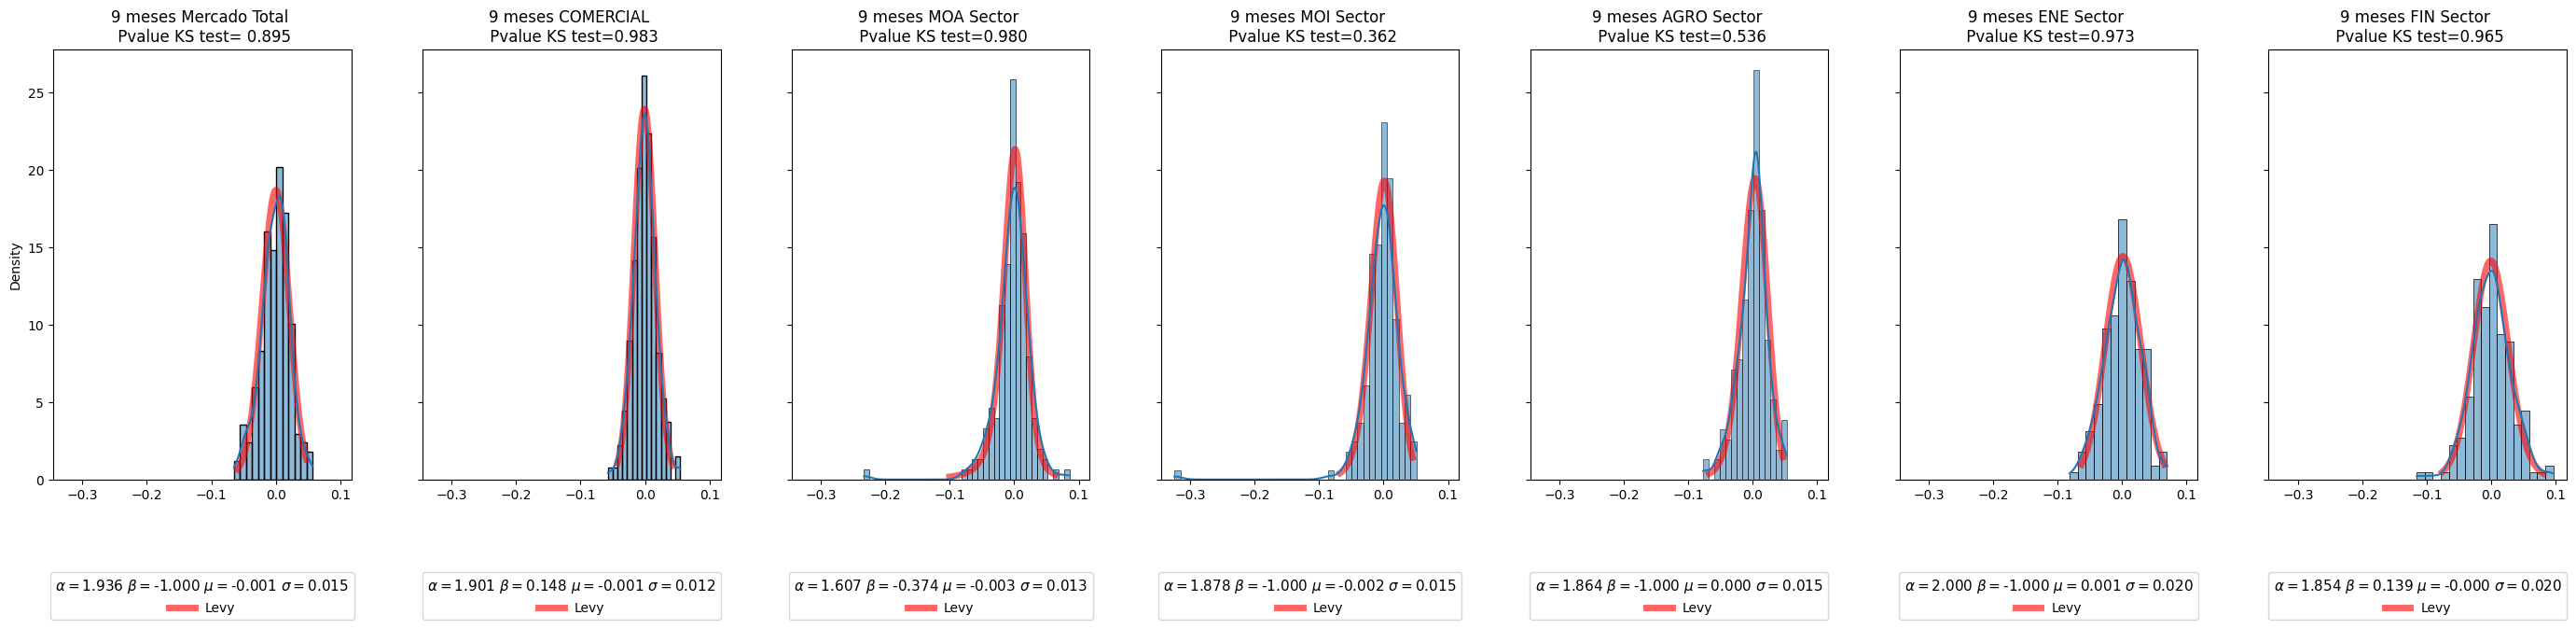

In [104]:
# Histograma para 9 meses levy stable 
fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(28, 7) # Aumenté un poco el alto para que quepa la leyenda abajo

# 0. TOTAL (Mercado)
alpha, beta, loc, scale = alphat9, betat9, loct9, scalet9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[0], data=y24s9, stat="density", kde=True)
ax[0].set_title(f"9 meses Mercado Total \n Pvalue KS test= {ktestt9.pvalue:.3f}")
ax[0].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

# 1. COME
alpha, beta, loc, scale = alpha_come9, beta_come9, loc_come9, scale_come9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[1], data=y24scome9, stat="density", kde=True)
ax[1].set_title(f"9 meses COMERCIAL \n Pvalue KS test={ktestcom9.pvalue:.3f}")
ax[1].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))
# 2. MOA
alpha, beta, loc, scale = alphamoa9, betamoa9, locmoa9, scalemoa9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[2].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[2], data=y24smoa9, stat="density", kde=True)
ax[2].set_title(f"9 meses MOA Sector \n Pvalue KS test={ktestmoa9.pvalue:.3f}")
ax[2].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))
# 3. MOI
alpha, beta, loc, scale = alphamoi9, betamoi9, locmoi9, scalemoi9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[3].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[3], data=y24smoi9, stat="density", kde=True)
ax[3].set_title(f"9 meses MOI Sector \n Pvalue KS test={ktestmoi9.pvalue:.3f}")
ax[3].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

# 4. AGRO
alpha, beta, loc, scale = alphaagro9, betaagro9, locagro9, scaleagro9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[4].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[4], data=y24sagro9, stat="density", kde=True)
ax[4].set_title(f"9 meses AGRO Sector \n Pvalue KS test={ktestagro9.pvalue:.3f}")
ax[4].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

# 5. ENE
alpha, beta, loc, scale = alphaene9, betaene9, locene9, scaleene9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[5].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[5], data=y24sene9, stat="density", kde=True)
ax[5].set_title(f"9 meses ENE Sector \n Pvalue KS test={ktestene9.pvalue:.3f}")
ax[5].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

# 6. FIN
alpha, beta, loc, scale = alphafin9, betafin9, locfin9, scalefin9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[6].plot(x, stats.levy_stable.pdf(x, alpha, beta, loc, scale), 'r-', lw=5, alpha=0.6, label='Levy')
sns.histplot(ax=ax[6], data=y24sfin9, stat="density", kde=True)
ax[6].set_title(f"9 meses FIN Sector \n Pvalue KS test={ktestfin9.pvalue:.3f}")
ax[6].legend(title=fr"$\alpha=${alpha:.3f} $\beta=${beta:.3f} $\mu=${loc:.3f} $\sigma=${scale:.3f}", title_fontsize = "11", loc='upper center', bbox_to_anchor=(0.5, -0.2))

fig.tight_layout()
plt.savefig("imgs/Levy9hist.pdf", format="pdf", bbox_inches='tight')
# blue line is empirical data and red line is teorical data of the goodness 

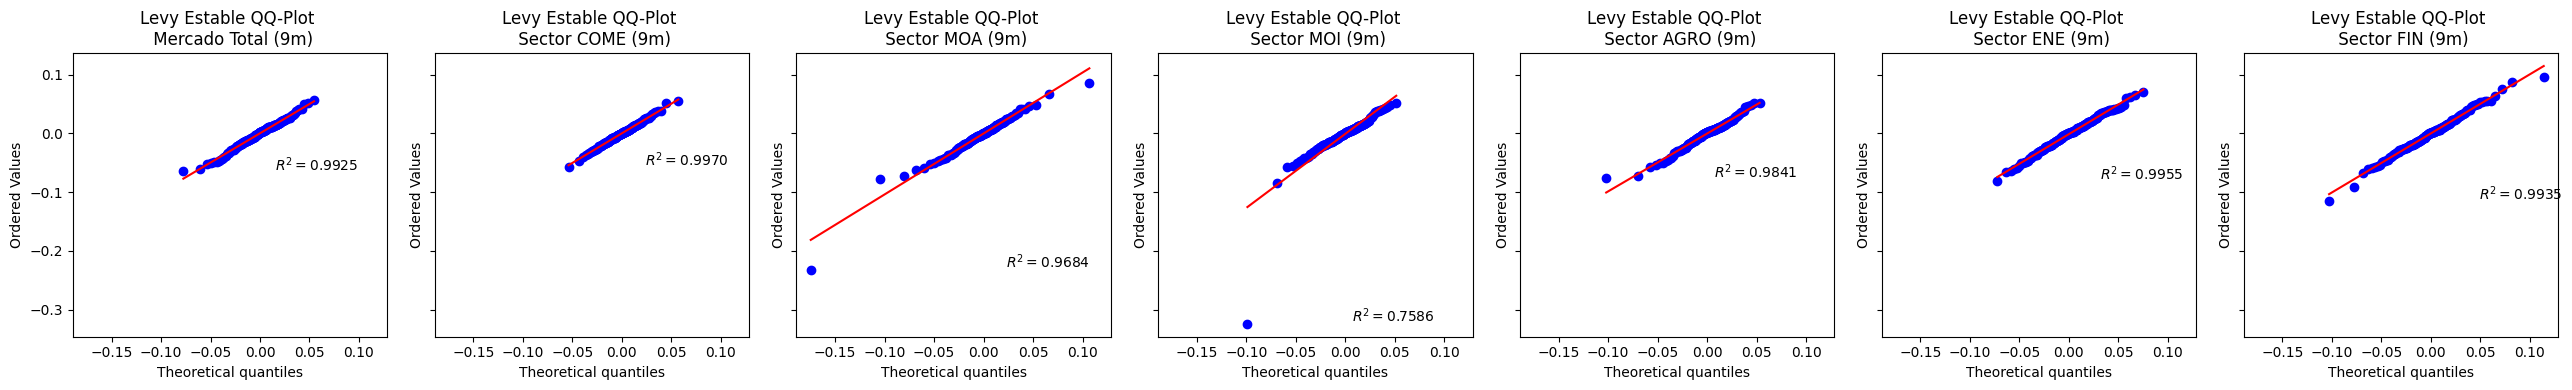

In [92]:
# QQPLOT LEVY PARA 9 MESES
fig, axs = plt.subplots(1, 7, sharey=True, sharex=True, figsize=(10, 5))
fig.set_size_inches(26, 4)

# 0. Mercado Total
alpha, beta, loc, scale = alphat9, betat9, loct9, scalet9
stats.probplot(y24s9, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[0])
axs[0].set_title("Levy Estable QQ-Plot \n Mercado Total (9m)")

# 1. Comercial (COME)
alpha, beta, loc, scale = alpha_come9, beta_come9, loc_come9, scale_come9
stats.probplot(y24scome9, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[1])
axs[1].set_title("Levy Estable QQ-Plot \n Sector COME (9m)")

# 2. MOA
alpha, beta, loc, scale = alphamoa9, betamoa9, locmoa9, scalemoa9
stats.probplot(y24smoa9, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[2])
axs[2].set_title("Levy Estable QQ-Plot \n Sector MOA (9m)")

# 3. MOI
alpha, beta, loc, scale = alphamoi9, betamoi9, locmoi9, scalemoi9
stats.probplot(y24smoi9, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[3])
axs[3].set_title("Levy Estable QQ-Plot \n Sector MOI (9m)")

# 4. AGRO
alpha, beta, loc, scale = alphaagro9, betaagro9, locagro9, scaleagro9
stats.probplot(y24sagro9, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[4])
axs[4].set_title("Levy Estable QQ-Plot \n Sector AGRO (9m)")

# 5. ENE
alpha, beta, loc, scale = alphaene9, betaene9, locene9, scaleene9
stats.probplot(y24sene9, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[5])
axs[5].set_title("Levy Estable QQ-Plot \n Sector ENE (9m)")

# 6. FIN
alpha, beta, loc, scale = alphafin9, betafin9, locfin9, scalefin9
stats.probplot(y24sfin9, dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[6])
axs[6].set_title("Levy Estable QQ-Plot \n Sector FIN (9m)")

plt.tight_layout()
plt.savefig("imgs/Levy9moqqplot.pdf", format="pdf", bbox_inches='tight')

In [41]:
#  BONDAD AJUSTE para 6 meses levy stable 

y24scome6 = rend6m[come].mean(axis = 1, skipna = True) 
alpha_come6, beta_come6, loc_come6, scale_come6 = stats.levy_stable.fit(y24scome6)
ktestcom6 = stats.ks_1samp(x=y24scome6, cdf=stats.levy_stable.cdf, args=(alpha_come6, beta_come6, loc_come6, scale_come6 ))

y24smoa6 = rend6m[moa].mean(axis = 1, skipna = True) 
alphamoa6, betamoa6, locmoa6, scalemoa6 = stats.levy_stable.fit(y24smoa6)
ktestmoa6 = stats.ks_1samp(x=y24smoa6, cdf=stats.levy_stable.cdf, args=(alphamoa6, betamoa6, locmoa6, scalemoa6))

y24smoi6 = rend6m[moi].mean(axis = 1, skipna = True) 
alphamoi6, betamoi6, locmoi6, scalemoi6 = stats.levy_stable.fit(y24smoi6)
ktestmoi6 = stats.ks_1samp(x=y24smoi6, cdf=stats.levy_stable.cdf, args=(alphamoi6, betamoi6, locmoi6, scalemoi6))

y24sagro6 = rend6m[agro].mean(axis = 1, skipna = True) 
alphaagro6, betaagro6, locagro6, scaleagro6 = stats.levy_stable.fit(y24sagro6)
ktestagro6 = stats.ks_1samp(x=y24sagro6, cdf= stats.levy_stable.cdf, args=(alphaagro6, betaagro6, locagro6, scaleagro6))

y24sene6 = rend6m[ene].mean(axis = 1, skipna = True) 
alphaene6, betaene6, locene6, scaleene6 = stats.levy_stable.fit(y24sene6)
ktestene6= stats.ks_1samp(x=y24sene6, cdf=stats.levy_stable.cdf, args=(alphaene6, betaene6, locene6, scaleene6))

y24sfin6 = rend6m[fin].mean(axis = 1, skipna = True) 
alphafin6, betafin6, locfin6, scalefin6 = stats.levy_stable.fit(y24sfin6)
ktestfin6=stats.ks_1samp(x=y24sfin6, cdf=stats.levy_stable.cdf, args=(alphafin6, betafin6, locfin6, scalefin6 ))

y24s6 = rend6m.mean(axis = 1, skipna = True) 
alphat6, betat6, loct6, scalet6 = stats.levy_stable.fit(y24s6)
ktestt6= stats.ks_1samp(x=y24s6, cdf=stats.levy_stable.cdf, args=(alphat6, betat6, loct6, scalet6 ))


 


In [46]:
# Listado de sectores y nombres para el índice
sectores = ['come', 'moa', 'moi', 'agro', 'ene', 'fin', 'total']
nombres_sectores = ['COME', 'MOA', 'MOI', 'AGRO', 'ENE', 'FIN', 'Total']

# Creamos una lista para almacenar las filas de 3 meses
datos_ajuste_3 = []

# Extraemos las variables de memoria generadas para 3 meses
try:
    # 1. COME
    datos_ajuste_3.append(['COME', alpha_come3, beta_come3, loc_come3, scale_come3, ktestcom3.statistic, ktestcom3.pvalue])
    # 2. MOA
    datos_ajuste_3.append(['MOA', alphamoa3, betamoa3, locmoa3, scalemoa3, ktestmoa3.statistic, ktestmoa3.pvalue])
    # 3. MOI
    datos_ajuste_3.append(['MOI', alphamoi3, betamoi3, locmoi3, scalemoi3, ktestmoi3.statistic, ktestmoi3.pvalue])
    # 4. AGRO
    datos_ajuste_3.append(['AGRO', alphaagro3, betaagro3, locagro3, scaleagro3, ktestagro3.statistic, ktestagro3.pvalue])
    # 5. ENE
    datos_ajuste_3.append(['ENE', alphaene3, betaene3, locene3, scaleene3, ktestene3.statistic, ktestene3.pvalue])
    # 6. FIN
    datos_ajuste_3.append(['FIN', alphafin3, betafin3, locfin3, scalefin3, ktestfin3.statistic, ktestfin3.pvalue])
    # 7. TOTAL (Merval)
    datos_ajuste_3.append(['TOTAL', alphat3, betat3, loct3, scalet3, ktestt3.statistic, ktestt3.pvalue])

    # Crear el DataFrame para 3 meses
    df_resultados_levy3m = pd.DataFrame(datos_ajuste_3, columns=[
        'Sector', 'Alpha', 'Beta', 'Loc (Mu)', 'Scale (Sigma)', 'KS Statistic', 'P-Value'
    ])

    # Agregamos la columna de horizonte temporal
    df_resultados_levy3m['Horizonte temporal'] = "3 meses"

except NameError:
    # En caso de que alguna variable no se haya calculado o falte en memoria
    pass

# Para visualizarlo en la consulta
df_resultados_levy3m

,Sector,Alpha,Beta,Loc (Mu),Scale (Sigma),KS Statistic,P-Value,Horizonte temporal
0,COME,1.921988,0.999990,0.000520,0.010091,0.068913,0.914859,3 meses
1,MOA,1.623973,0.580927,0.001307,0.010535,0.047740,0.997955,3 meses
2,MOI,1.999994,-0.172058,0.000450,0.012284,0.084171,0.748594,3 meses
3,AGRO,1.999998,0.297929,0.000234,0.013766,0.047142,0.998300,3 meses
4,ENE,2.000000,-1.000000,0.002323,0.018403,0.063658,0.952397,3 meses
5,FIN,1.907617,-0.999973,-0.002929,0.017263,0.059350,0.973944,3 meses
6,TOTAL,2.000000,-1.000000,0.001161,0.012511,0.101851,0.518578,3 meses


In [42]:
# Listado de sectores y nombres para el índice
sectores = ['come', 'moa', 'moi', 'agro', 'ene', 'fin', 'total']
nombres_sectores = ['COME', 'MOA', 'MOI', 'AGRO', 'ENE', 'FIN', 'Total']

# Creamos una lista para almacenar las filas de 6 meses
datos_ajuste_6 = []

# Extraemos las variables de memoria generadas para 6 meses
try:
    # 1. COME
    datos_ajuste_6.append(['COME', alpha_come6, beta_come6, loc_come6, scale_come6, ktestcom6.statistic, ktestcom6.pvalue])
    # 2. MOA
    datos_ajuste_6.append(['MOA', alphamoa6, betamoa6, locmoa6, scalemoa6, ktestmoa6.statistic, ktestmoa6.pvalue])
    # 3. MOI
    datos_ajuste_6.append(['MOI', alphamoi6, betamoi6, locmoi6, scalemoi6, ktestmoi6.statistic, ktestmoi6.pvalue])
    # 4. AGRO
    datos_ajuste_6.append(['AGRO', alphaagro6, betaagro6, locagro6, scaleagro6, ktestagro6.statistic, ktestagro6.pvalue])
    # 5. ENE
    datos_ajuste_6.append(['ENE', alphaene6, betaene6, locene6, scaleene6, ktestene6.statistic, ktestene6.pvalue])
    # 6. FIN
    datos_ajuste_6.append(['FIN', alphafin6, betafin6, locfin6, scalefin6, ktestfin6.statistic, ktestfin6.pvalue])
    # 7. TOTAL (Merval)
    datos_ajuste_6.append(['TOTAL', alphat6, betat6, loct6, scalet6, ktestt6.statistic, ktestt6.pvalue])

    # Crear el DataFrame para 6 meses
    df_resultados_levy6m = pd.DataFrame(datos_ajuste_6, columns=[
        'Sector', 'Alpha', 'Beta', 'Loc (Mu)', 'Scale (Sigma)', 'KS Statistic', 'P-Value'
    ])

    # Agregamos la columna de horizonte temporal
    df_resultados_levy6m['Horizonte temporal'] = "6 meses"

except NameError:
    # En caso de que alguna variable no se haya calculado o falte en memoria
    pass

# Para visualizarlo en la consulta
df_resultados_levy6m

,Sector,Alpha,Beta,Loc (Mu),Scale (Sigma),KS Statistic,P-Value,Horizonte temporal
0,COME,1.855608,0.436157,-0.001516,0.012449,0.044946,0.962326,6 meses
1,MOA,1.584648,-0.241642,-0.004037,0.014144,0.041357,0.982696,6 meses
2,MOI,1.922100,-0.999970,-0.002740,0.015562,0.054173,0.860371,6 meses
3,AGRO,1.911949,-0.999984,-0.002084,0.015999,0.051297,0.899462,6 meses
4,ENE,1.999997,0.159413,-0.001998,0.021238,0.053142,0.875049,6 meses
5,FIN,1.819232,0.260307,-0.002553,0.020157,0.062339,0.724833,6 meses
6,TOTAL,1.999994,-0.150724,-0.002374,0.016511,0.062379,0.724102,6 meses


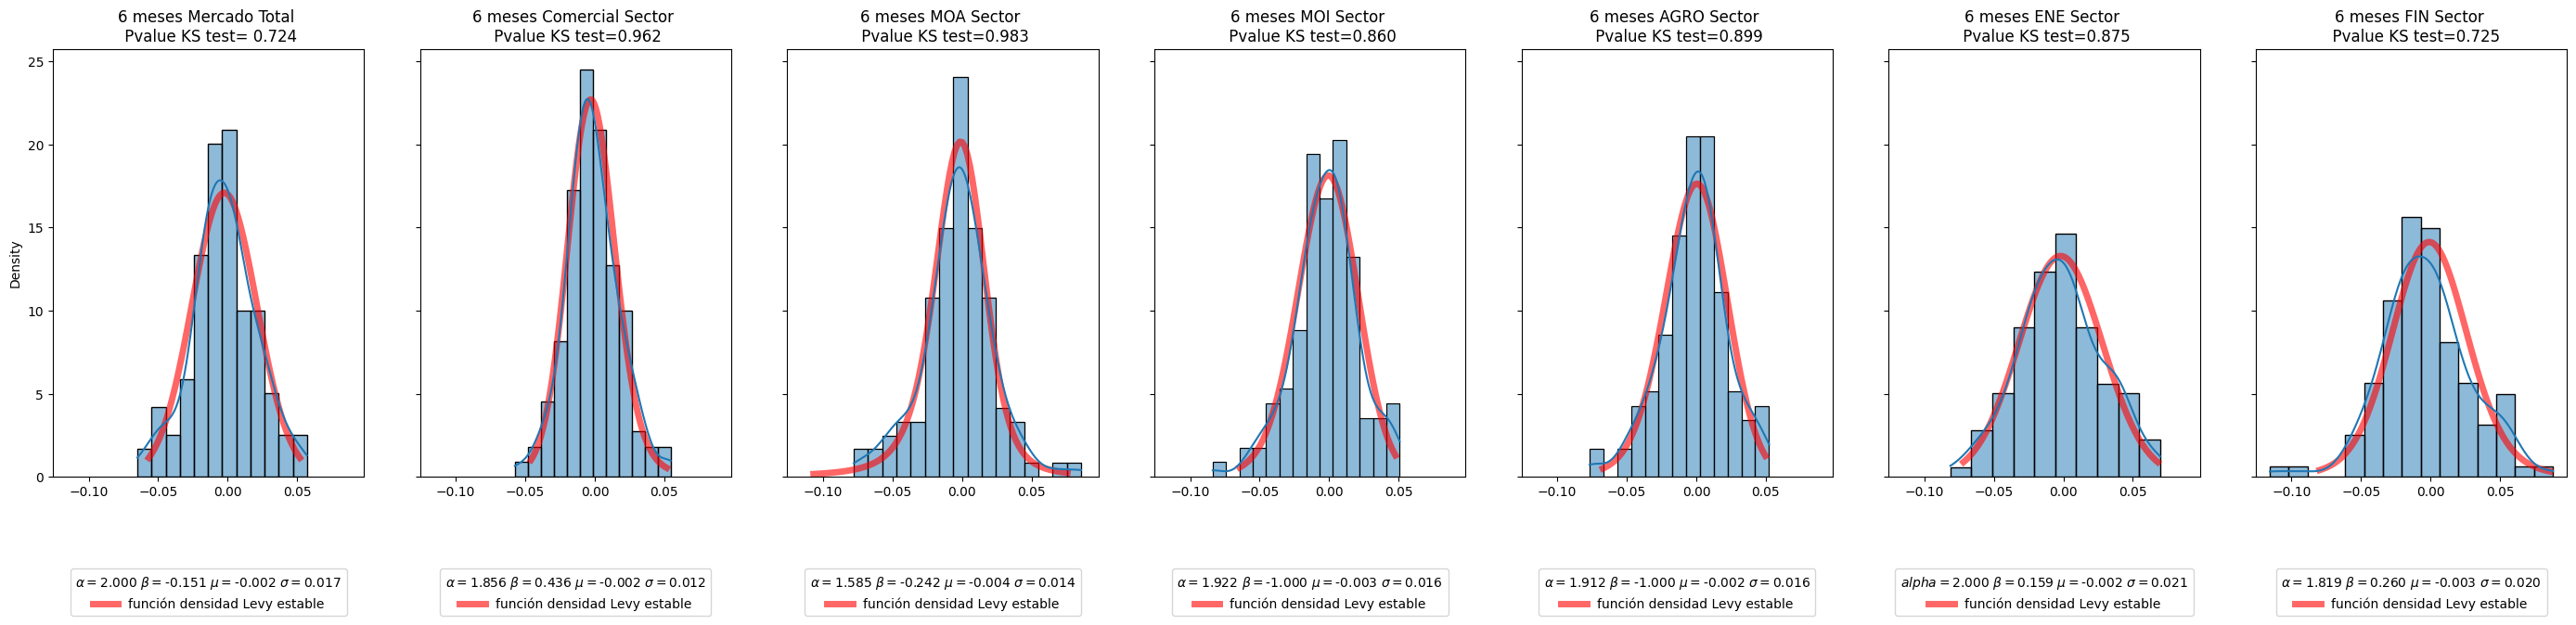

In [107]:
# Histograma para 6 meses levy stable 

fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(28, 7)
#todo
alpha, beta, loc, scale = alphat6, betat6, loct6, scalet6
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[0],data=y24s6,stat = "density",kde=True)
ax[0].set_title(f"6 meses Mercado Total \n Pvalue KS test= {ktestt6.pvalue:.3f}")
ax[0].legend(title=fr"$\alpha=${alphat6:.3f} $\beta=${betat6:.3f} $\mu=${loct6:.3f} $\sigma=${scalet6:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#come
alpha, beta, loc, scale = alpha_come6, beta_come6, loc_come6, scale_come6 
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[1],data=y24scome6, stat = "density",kde=True)
ax[1].set_title(f"6 meses Comercial Sector \n Pvalue KS test={ktestcom6.pvalue:.3f}")
ax[1].legend(title=fr"$\alpha=${alpha_come6:.3f} $\beta=${beta_come6:.3f} $\mu=${loc_come6:.3f} $\sigma=${scale_come6:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#moa
alpha, beta, loc, scale = alphamoa6, betamoa6, locmoa6, scalemoa6
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[2].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[2],data=y24smoa6, stat = "density",kde=True)
ax[2].set_title(f"6 meses MOA Sector \n Pvalue KS test={ktestmoa6.pvalue:.3f}")
ax[2].legend(title=fr"$\alpha=${alphamoa6:.3f} $\beta=${betamoa6:.3f} $\mu=${locmoa6:.3f} $\sigma=${scalemoa6:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#moi
alpha, beta, loc, scale = alphamoi6, betamoi6, locmoi6, scalemoi6
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[3].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[3],data=y24smoi6, stat = "density",kde=True)
ax[3].set_title(f"6 meses MOI Sector \n Pvalue KS test={ktestmoi6.pvalue:.3f}" )
ax[3].legend(title=fr"$\alpha=${alphamoi6:.3f} $\beta=${betamoi6:.3f} $\mu=${locmoi6:.3f} $\sigma=${scalemoi6:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#agro
alpha, beta, loc, scale = alphaagro6, betaagro6, locagro6, scaleagro6
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[4].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[4],data=y24sagro6, stat = "density",kde=True)
ax[4].set_title(f"6 meses AGRO Sector \n Pvalue KS test={ktestagro6.pvalue:.3f}")
ax[4].legend(title=fr"$\alpha=${alphaagro6:.3f} $\beta=${betaagro6:.3f} $\mu=${locagro6:.3f} $\sigma=${scaleagro6:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#ene
alpha, beta, loc, scale = alphaene6, betaene6, locene6, scaleene6
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[5].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[5],data=y24sene6, stat = "density",kde=True)
ax[5].set_title(f"6 meses ENE Sector \n Pvalue KS test={ktestene6.pvalue:.3f}")
ax[5].legend(title=fr"$alpha=${alphaene6:.3f} $\beta=${betaene6:.3f} $\mu=${locene6:.3f} $\sigma=${scaleene6:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#FIN
alpha, beta, loc, scale = alphafin6, betafin9, locfin9, scalefin9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[6].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[6],data=y24sfin6, stat = "density",kde=True)
ax[6].set_title(f"6 meses FIN Sector \n  Pvalue KS test={ktestfin6.pvalue:.3f}")
ax[6].legend(title=fr"$\alpha=${alphafin6:.3f} $\beta=${betafin6:.3f} $\mu=${locfin6:.3f} $\sigma=${scalefin6:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

fig.tight_layout()
plt.savefig("imgs/Levy6hist.pdf", format="pdf", bbox_inches='tight')



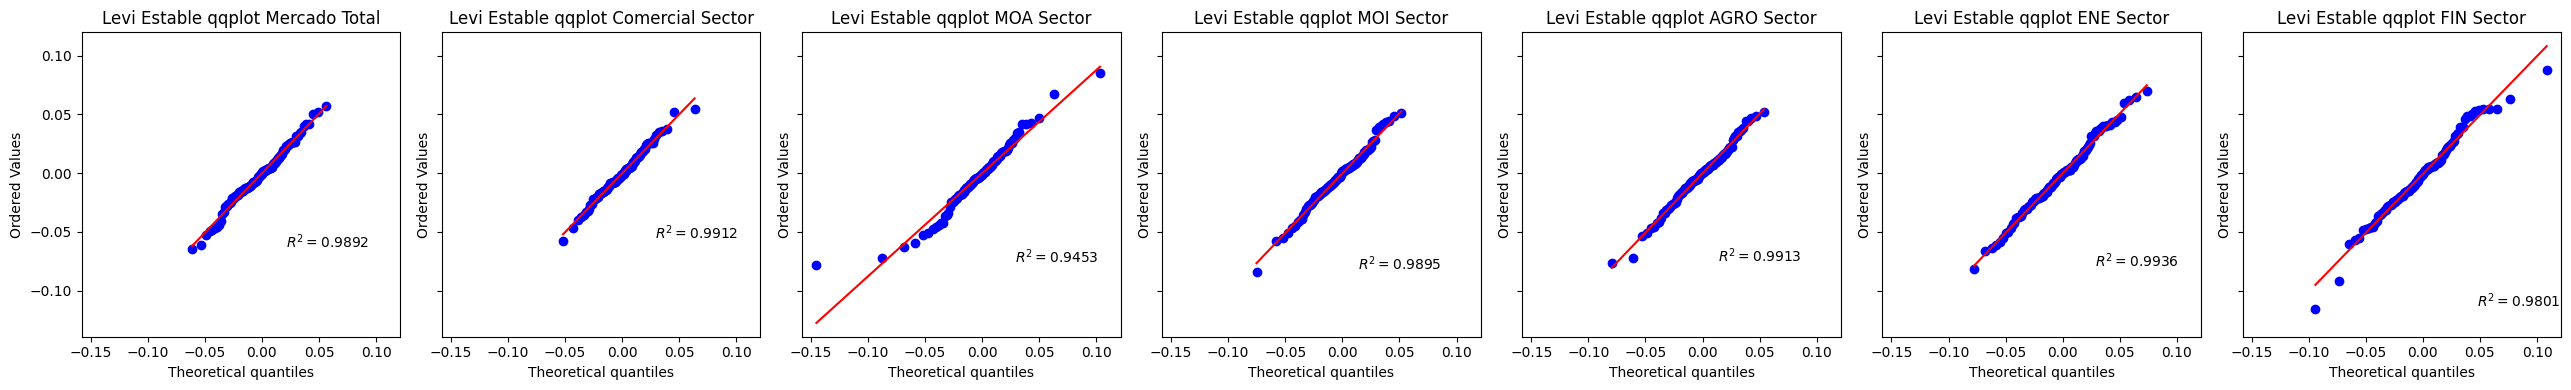

In [91]:
#QQPLOT LEVI PARA 6 MESES 
fig, axs = plt.subplots(1, 7, sharey=True, sharex=True, figsize=(10, 5))
fig.set_size_inches(26,4)


#todo
alpha, beta, loc, scale = alphat6, betat6, loct6, scalet6
stats.probplot(y24s6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[0])
axs[0].set_title(f"Levi Estable qqplot Mercado Total")


#come
alpha, beta, loc, scale = alpha_come6, beta_come6, loc_come6, scale_come6 
stats.probplot(y24scome6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[1])
axs[1].set_title(f"Levi Estable qqplot Comercial Sector")


#moa
alpha, beta, loc, scale = alphamoa6, betamoa6, locmoa6, scalemoa6
stats.probplot(y24smoa6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[2])
axs[2].set_title(f"Levi Estable qqplot MOA Sector")

#moi
alpha, beta, loc, scale = alphamoi6, betamoi6, locmoi6, scalemoi6
stats.probplot(y24smoi6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[3])
axs[3].set_title(f"Levi Estable qqplot MOI Sector" )

#agro
alpha, beta, loc, scale = alphaagro6, betaagro6, locagro6, scaleagro6
stats.probplot(y24sagro6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[4])
axs[4].set_title(f"Levi Estable qqplot AGRO Sector")

#ene
alpha, beta, loc, scale = alphaene6, betaene6, locene6, scaleene6
stats.probplot(y24sene6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[5])
axs[5].set_title(f"Levi Estable qqplot ENE Sector")


#FIN
alpha, beta, loc, scale = alphafin6, betafin6, locfin6, scalefin6
stats.probplot(y24sfin6,dist='levy_stable', sparams=(alpha, beta, loc, scale),rvalue=True, plot=axs[6])
axs[6].set_title(f"Levi Estable qqplot FIN Sector")



plt.tight_layout()

plt.savefig("imgs/Levy6moqqplot.pdf", format="pdf", bbox_inches='tight')

In [45]:
#  BONDAD AJUSTE para 3 meses levy stable 

y24scome3 = rend3m[come].mean(axis = 1, skipna = True) 
alpha_come3, beta_come3, loc_come3, scale_come3 = stats.levy_stable.fit(y24scome3)
ktestcom3 = stats.ks_1samp(x=y24scome3, cdf=stats.levy_stable.cdf, args=(alpha_come3, beta_come3, loc_come3, scale_come3 ))

y24smoa3 = rend3m[moa].mean(axis = 1, skipna = True) 
alphamoa3, betamoa3, locmoa3, scalemoa3 = stats.levy_stable.fit(y24smoa3)
ktestmoa3 = stats.ks_1samp(x=y24smoa3, cdf=stats.levy_stable.cdf, args=(alphamoa3, betamoa3, locmoa3, scalemoa3))

y24smoi3 = rend3m[moi].mean(axis = 1, skipna = True) 
alphamoi3, betamoi3, locmoi3, scalemoi3 = stats.levy_stable.fit(y24smoi3)
ktestmoi3 = stats.ks_1samp(x=y24smoi3, cdf=stats.levy_stable.cdf, args=(alphamoi3, betamoi3, locmoi3, scalemoi3))

y24sagro3 = rend3m[agro].mean(axis = 1, skipna = True) 
alphaagro3, betaagro3, locagro3, scaleagro3 = stats.levy_stable.fit(y24sagro3)
ktestagro3 = stats.ks_1samp(x=y24sagro3, cdf= stats.levy_stable.cdf, args=(alphaagro3, betaagro3, locagro3, scaleagro3 ))

y24sene3 = rend3m[ene].mean(axis = 1, skipna = True) 
alphaene3, betaene3, locene3, scaleene3 = stats.levy_stable.fit(y24sene3)
ktestene3= stats.ks_1samp(x=y24sene3, cdf=stats.levy_stable.cdf, args=(alphaene3, betaene3, locene3, scaleene3))

y24sfin3 = rend3m[fin].mean(axis = 1, skipna = True) 
alphafin3, betafin3, locfin3, scalefin3 = stats.levy_stable.fit(y24sfin3)
ktestfin3=stats.ks_1samp(x=y24sfin3, cdf=stats.levy_stable.cdf, args=(alphafin3, betafin3, locfin3, scalefin3 ))

y24s3 = rend3m.mean(axis = 1, skipna = True) 
alphat3, betat3, loct3, scalet3 = stats.levy_stable.fit(y24s3)
ktestt3= stats.ks_1samp(x=y24s3, cdf=stats.levy_stable.cdf, args=(alphat3, betat3, loct3, scalet3))


In [48]:
# Listado de sectores y nombres para el índice
sectores = ['come', 'moa', 'moi', 'agro', 'ene', 'fin', 'total']
nombres_sectores = ['COME', 'MOA', 'MOI', 'AGRO', 'ENE', 'FIN', 'Total']

# Creamos una lista para almacenar las filas de 3 meses
datos_ajuste_3 = []

# Extraemos las variables de memoria generadas para 3 meses
try:
    # 1. COME
    datos_ajuste_3.append(['COME', alpha_come3, beta_come3, loc_come3, scale_come3, ktestcom3.statistic, ktestcom3.pvalue])
    # 2. MOA
    datos_ajuste_3.append(['MOA', alphamoa3, betamoa3, locmoa3, scalemoa3, ktestmoa3.statistic, ktestmoa3.pvalue])
    # 3. MOI
    datos_ajuste_3.append(['MOI', alphamoi3, betamoi3, locmoi3, scalemoi3, ktestmoi3.statistic, ktestmoi3.pvalue])
    # 4. AGRO
    datos_ajuste_3.append(['AGRO', alphaagro3, betaagro3, locagro3, scaleagro3, ktestagro3.statistic, ktestagro3.pvalue])
    # 5. ENE
    datos_ajuste_3.append(['ENE', alphaene3, betaene3, locene3, scaleene3, ktestene3.statistic, ktestene3.pvalue])
    # 6. FIN
    datos_ajuste_3.append(['FIN', alphafin3, betafin3, locfin3, scalefin3, ktestfin3.statistic, ktestfin3.pvalue])
    # 7. TOTAL (Merval)
    datos_ajuste_3.append(['TOTAL', alphat3, betat3, loct3, scalet3, ktestt3.statistic, ktestt3.pvalue])

    # Crear el DataFrame para 3 meses
    df_resultados_levy3m = pd.DataFrame(datos_ajuste_3, columns=[
        'Sector', 'Alpha', 'Beta', 'Loc (Mu)', 'Scale (Sigma)', 'KS Statistic', 'P-Value'
    ])

    # Agregamos la columna de horizonte temporal
    df_resultados_levy3m['Horizonte temporal'] = "3 meses"

except NameError:
    # En caso de que alguna variable no se haya calculado o falte en memoria
    pass

# Para visualizarlo en la consulta
df_resultados_levy3m

,Sector,Alpha,Beta,Loc (Mu),Scale (Sigma),KS Statistic,P-Value,Horizonte temporal
0,COME,1.921988,0.999990,0.000520,0.010091,0.068913,0.914859,3 meses
1,MOA,1.623973,0.580927,0.001307,0.010535,0.047740,0.997955,3 meses
2,MOI,1.999994,-0.172058,0.000450,0.012284,0.084171,0.748594,3 meses
3,AGRO,1.999998,0.297929,0.000234,0.013766,0.047142,0.998300,3 meses
4,ENE,2.000000,-1.000000,0.002323,0.018403,0.063658,0.952397,3 meses
5,FIN,1.907617,-0.999973,-0.002929,0.017263,0.059350,0.973944,3 meses
6,TOTAL,2.000000,-1.000000,0.001161,0.012511,0.101851,0.518578,3 meses


In [49]:
# Lista de todos los DataFrames creados previamente
bases_levy = [
    df_resultados_levy19m, 
    df_resultados_levy12m, 
    df_resultados_levy9m, 
    df_resultados_levy6m, 
    df_resultados_levy3m
]

# Unificamos todas las bases en una sola
# ignore_index=True reinicia el índice para que sea continuo del 0 al final
df_levy_consolidado = pd.concat(bases_levy, ignore_index=True)

# Opcional: Reordenar las columnas para que la temporalidad esté al principio
cols = ['Horizonte temporal'] + [c for c in df_levy_consolidado.columns if c != 'Horizonte temporal']
df_levy_consolidado = df_levy_consolidado[cols]

# Mostrar el resultado final
df_levy_consolidado

,Horizonte temporal,Sector,Alpha,Beta,Loc (Mu),Scale (Sigma),KS Statistic,P-Value
0,19 meses,COME,1.829489,0.212813,0.000804,0.013263,0.027252,0.920382
1,19 meses,MOA,1.654334,-0.305720,-0.001071,0.014340,0.035327,0.688148
2,19 meses,MOI,1.884334,-0.999982,-0.000126,0.014465,0.044258,0.403469
3,19 meses,AGRO,1.786275,-0.298933,-0.000151,0.014001,0.036250,0.657097
4,19 meses,ENE,1.918528,-0.806466,0.000830,0.017968,0.028268,0.898219
5,19 meses,FIN,1.884239,-0.342318,0.001846,0.020401,0.034124,0.728225
6,19 meses,TOTAL,1.855392,-0.675452,-0.000213,0.014560,0.026355,0.937532
7,12 meses,COME,1.899862,0.097854,-0.000200,0.011113,0.031102,0.965866
8,12 meses,MOA,1.633121,-0.296685,-0.002299,0.012174,0.030855,0.968205
9,12 meses,MOI,1.841531,-0.658029,-0.001496,0.013477,0.039405,0.826589


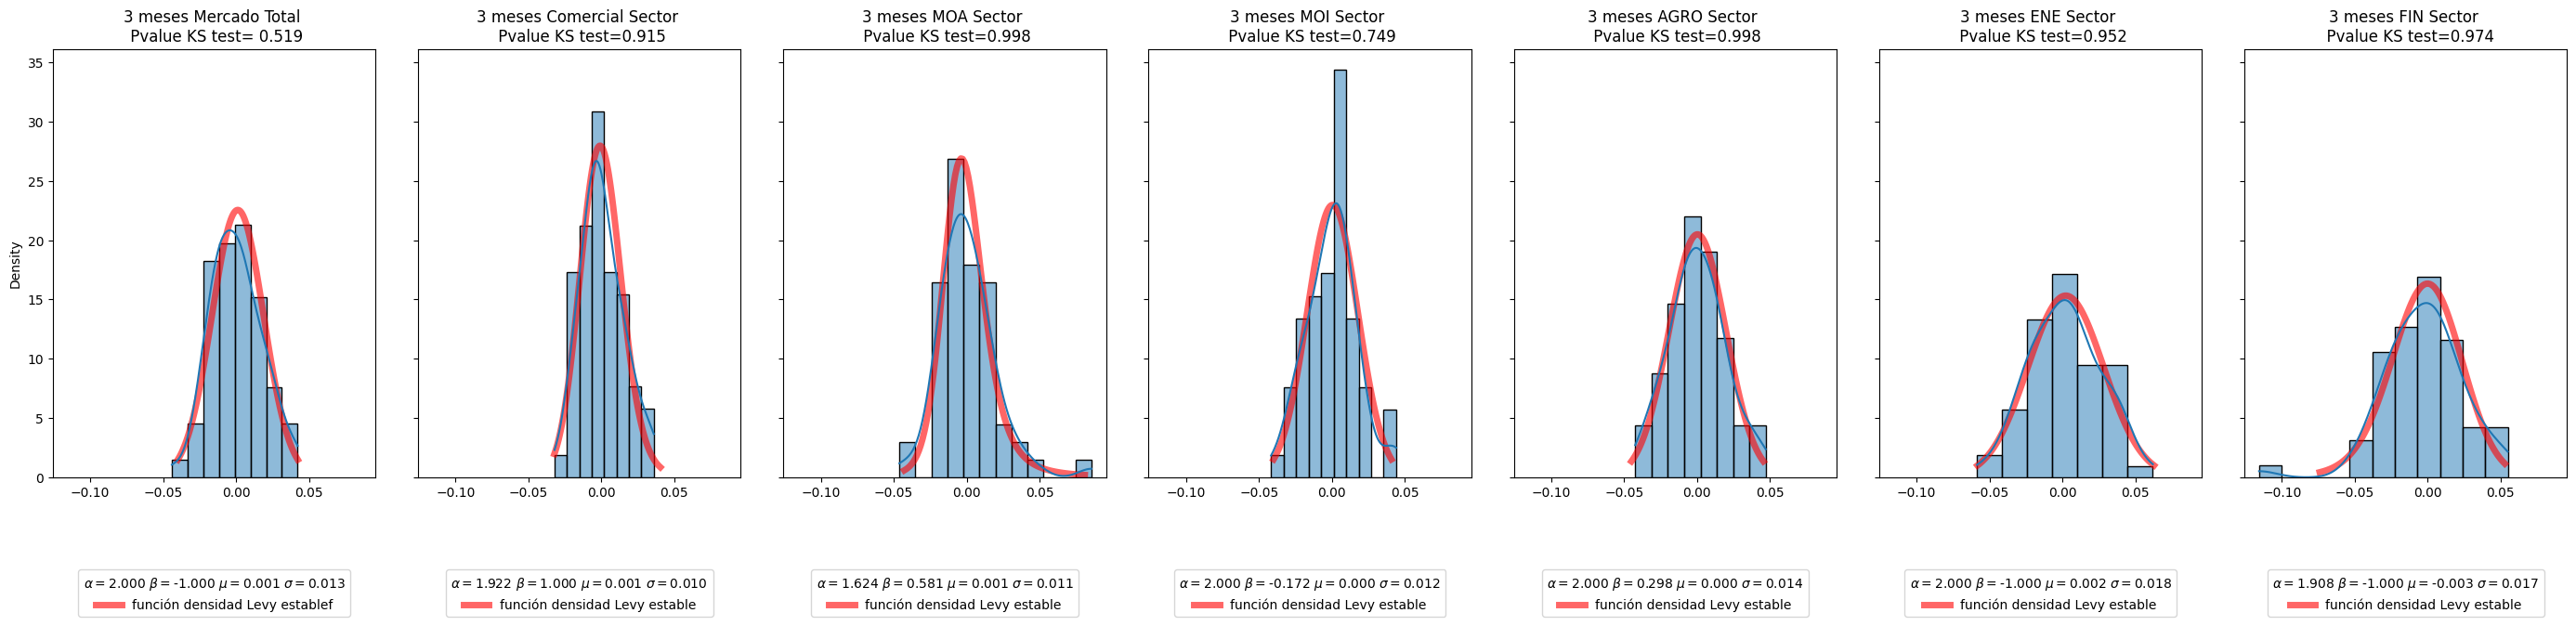

In [108]:
# Histograma para 3 meses levy stable 

fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(28, 7)
#todo
alpha, beta, loc, scale = alphat3, betat3, loct3, scalet3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy establef')
sns.histplot(ax=ax[0],data=y24s3,stat = "density",kde=True)
ax[0].set_title(f"3 meses Mercado Total \n Pvalue KS test= {ktestt3.pvalue:.3f}")
ax[0].legend(title=fr"$\alpha=${alphat3:.3f} $\beta=${betat3:.3f} $\mu=${loct3:.3f} $\sigma=${scalet3:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#come
alpha, beta, loc, scale = alpha_come3, beta_come3, loc_come3, scale_come3 
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[1],data=y24scome3, stat = "density",kde=True)
ax[1].set_title(f"3 meses Comercial Sector \n Pvalue KS test={ktestcom3.pvalue:.3f}")
ax[1].legend(title=fr"$\alpha=${alpha_come3:.3f} $\beta=${beta_come3:.3f} $\mu=${loc_come3:.3f} $\sigma=${scale_come3:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#moa
alpha, beta, loc, scale = alphamoa3, betamoa3, locmoa3, scalemoa3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[2].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[2],data=y24smoa3, stat = "density",kde=True)
ax[2].set_title(f"3 meses MOA Sector \n Pvalue KS test={ktestmoa3.pvalue:.3f}")
ax[2].legend(title=fr"$\alpha=${alphamoa3:.3f} $\beta=${betamoa3:.3f} $\mu=${locmoa3:.3f} $\sigma=${scalemoa3:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#moi
alpha, beta, loc, scale = alphamoi3, betamoi3, locmoi3, scalemoi3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[3].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[3],data=y24smoi3, stat = "density",kde=True)
ax[3].set_title(f"3 meses MOI Sector \n Pvalue KS test={ktestmoi3.pvalue:.3f}" )
ax[3].legend(title=fr"$\alpha=${alphamoi3:.3f} $\beta=${betamoi3:.3f} $\mu=${locmoi3:.3f} $\sigma=${scalemoi3:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#agro
alpha, beta, loc, scale = alphaagro3, betaagro3, locagro3, scaleagro3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[4].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[4],data=y24sagro3, stat = "density",kde=True)
ax[4].set_title(f"3 meses AGRO Sector \n Pvalue KS test={ktestagro3.pvalue:.3f}")
ax[4].legend(title=fr"$\alpha=${alphaagro3:.3f} $\beta=${betaagro3:.3f} $\mu=${locagro3:.3f} $\sigma=${scaleagro3:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#ene
alpha, beta, loc, scale = alphaene3, betaene3, locene3, scaleene3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[5].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[5],data=y24sene3, stat = "density",kde=True)
ax[5].set_title(f"3 meses ENE Sector \n Pvalue KS test={ktestene3.pvalue:.3f}")
ax[5].legend(title=fr"$\alpha=${alphaene3:.3f} $\beta=${betaene3:.3f} $\mu=${locene3:.3f} $\sigma=${scaleene3:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))

#FIN
alpha, beta, loc, scale = alphafin3, betafin3, locfin3, scalefin3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[6].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[6],data=y24sfin3, stat = "density",kde=True)
ax[6].set_title(f"3 meses FIN Sector \n  Pvalue KS test={ktestfin3.pvalue:.3f}")
ax[6].legend(title=fr"$\alpha=${alphafin3:.3f} $\beta=${betafin3:.3f} $\mu=${locfin3:.3f} $\sigma=${scalefin3:.3f}", title_fontsize = "10", loc='upper center', bbox_to_anchor=(0.5, -0.2))


fig.tight_layout()
plt.savefig("imgs/Levy3hist.pdf", format="pdf", bbox_inches='tight')


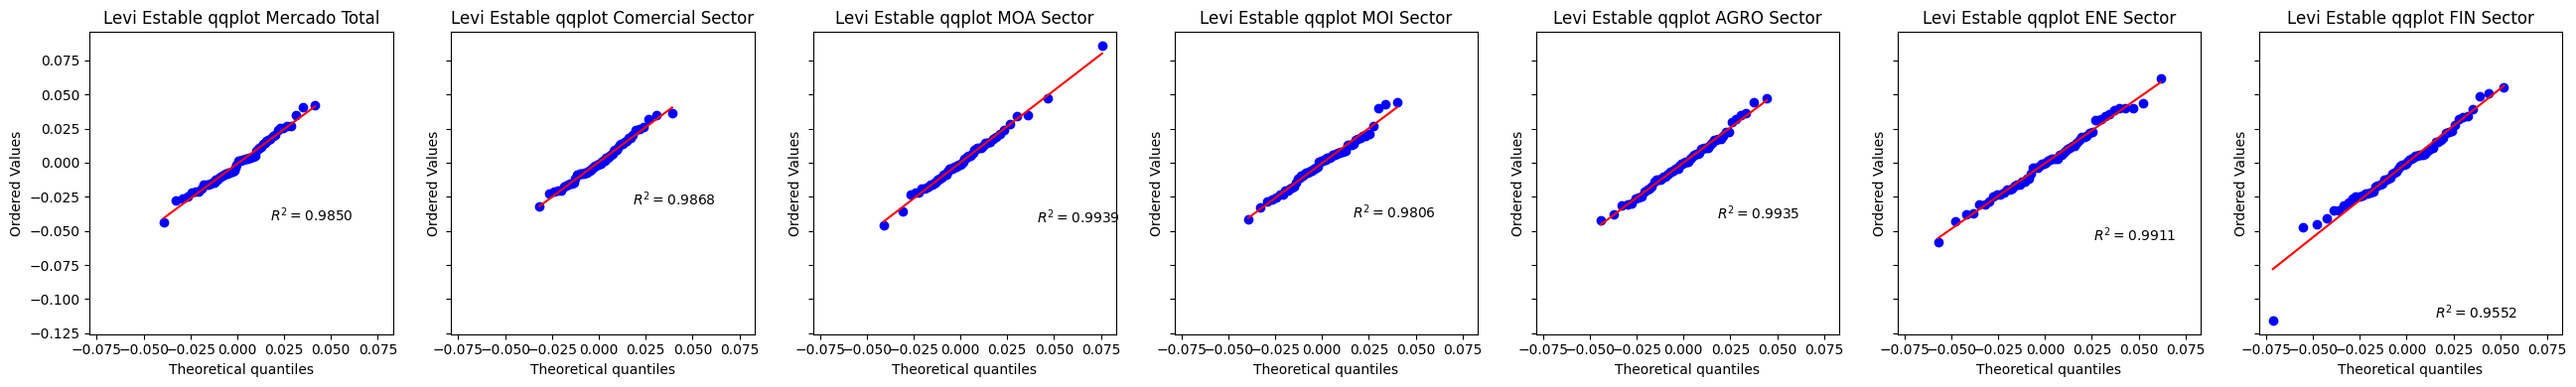

In [90]:
#QQPLOT LEVI PARA 3 MESES 
fig, axs = plt.subplots(1, 7, sharey=True, sharex=True, figsize=(10, 5))
fig.set_size_inches(26,4)


#todo
alpha, beta, loc, scale = alphat3, betat3, loct3, scalet3
stats.probplot(y24s3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[0])
axs[0].set_title(f"Levi Estable qqplot Mercado Total")


#come
alpha, beta, loc, scale = alpha_come3, beta_come3, loc_come3, scale_come3 
stats.probplot(y24scome3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[1])
axs[1].set_title(f"Levi Estable qqplot Comercial Sector")


#moa
alpha, beta, loc, scale = alphamoa3, betamoa3, locmoa3, scalemoa3
stats.probplot(y24smoa3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[2])
axs[2].set_title(f"Levi Estable qqplot MOA Sector")

#moi
alpha, beta, loc, scale = alphamoi3, betamoi3, locmoi3, scalemoi3
stats.probplot(y24smoi3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[3])
axs[3].set_title(f"Levi Estable qqplot MOI Sector" )

#agro
alpha, beta, loc, scale = alphaagro3, betaagro3, locagro3, scaleagro3
stats.probplot(y24sagro3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[4])
axs[4].set_title(f"Levi Estable qqplot AGRO Sector")

#ene
alpha, beta, loc, scale = alphaene3, betaene3, locene3, scaleene3
stats.probplot(y24sene3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[5])
axs[5].set_title(f"Levi Estable qqplot ENE Sector")


#FIN
alpha, beta, loc, scale = alphafin3, betafin3, locfin3, scalefin3
stats.probplot(y24sfin3,dist='levy_stable', sparams=(alpha, beta, loc, scale),rvalue=True, plot=axs[6])
axs[6].set_title(f"Levi Estable qqplot FIN Sector")



plt.tight_layout()

plt.savefig("imgs/Levy3moqqplot.pdf", format="pdf", bbox_inches='tight')

In [54]:
#  BONDAD AJUSTE para 12 meses NORMAL

nloc_come, nscale_come = stats.norm.fit(y19mcome)
ktestcom_n = stats.ks_1samp(x=y19mcome, cdf=stats.norm.cdf, args=(nloc_come, nscale_come ))

nloc_moa, nscale_moa = stats.norm.fit(y19mmoa)
ktestmoa_n = stats.ks_1samp(x=y19mmoa, cdf=stats.norm.cdf, args=(nloc_moa, nscale_moa))

nloc_moi, nscale_moi = stats.norm.fit(y19mmoi)
ktestmoi_n = stats.ks_1samp(x=y19mmoi, cdf=stats.norm.cdf, args=(nloc_moi, nscale_moi))

nloc_agro, nscale_agro = stats.norm.fit(y19magro)
ktestagro_n = stats.ks_1samp(x=y19mmoi, cdf=stats.norm.cdf, args=(nloc_moi, nscale_moi))

nloc_ene, nscale_ene = stats.norm.fit(y19mene)
ktestene_n = stats.ks_1samp(x=y19mene, cdf=stats.norm.cdf, args=(nloc_ene, nscale_ene))

nloc_fin, nscale_fin = stats.norm.fit(y19mfin)
ktestfin_n = stats.ks_1samp(x=y19mfin, cdf=stats.norm.cdf, args=(nloc_fin, nscale_fin))

nloc_t, nscale_t = stats.norm.fit(y19m)
ktesttot_n = stats.ks_1samp(x=y19m, cdf=stats.norm.cdf, args=(nloc_t, nscale_t))


In [59]:


# Listado de nombres para el índice
nombres_sectores = ['COME', 'MOA', 'MOI', 'AGRO', 'ENE', 'FIN', 'Total']

# Creamos una lista para almacenar las filas de la distribución Normal (19 meses)
datos_norm_19 = []

try:
    # 1. COME
    datos_norm_19.append(['COME', nloc_come, nscale_come, ktestcom_n.statistic, ktestcom_n.pvalue])
    # 2. MOA
    datos_norm_19.append(['MOA', nloc_moa, nscale_moa, ktestmoa_n.statistic, ktestmoa_n.pvalue])
    # 3. MOI
    datos_norm_19.append(['MOI', nloc_moi, nscale_moi, ktestmoi_n.statistic, ktestmoi_n.pvalue])
    # 4. AGRO
    datos_norm_19.append(['AGRO', nloc_agro, nscale_agro, ktestagro_n.statistic, ktestagro_n.pvalue])
    # 5. ENE
    datos_norm_19.append(['ENE', nloc_ene, nscale_ene, ktestene_n.statistic, ktestene_n.pvalue])
    # 6. FIN
    datos_norm_19.append(['FIN', nloc_fin, nscale_fin, ktestfin_n.statistic, ktestfin_n.pvalue])
    # 7. TOTAL (Mercado)
    datos_norm_19.append(['TOTAL', nloc_t, nscale_t, ktesttot_n.statistic, ktesttot_n.pvalue])

    # Crear el DataFrame
    df_resultados_norm19m = pd.DataFrame(datos_norm_19, columns=[
        'Sector', 'Loc (Mu)', 'Scale (Sigma)', 'KS Statistic', 'P-Value'
    ])

    # Agregamos info de horizonte y tipo de distribución
    df_resultados_norm19m['Horizonte temporal'] = "19 meses"
    df_resultados_norm19m['Distribución'] = "Normal"

except NameError as e:
    print(f"Error: Asegúrate de haber definido las variables de 19 meses. Detalle: {e}")

# Visualizar el DataFrame
df_resultados_norm19m

,Sector,Loc (Mu),Scale (Sigma),KS Statistic,P-Value,Horizonte temporal,Distribución
0,COME,0.000672,0.021041,0.047783,0.312104,19 meses,Normal
1,MOA,-0.000637,0.027218,0.083123,0.007585,19 meses,Normal
2,MOI,-0.001043,0.027391,0.100445,0.000588,19 meses,Normal
3,AGRO,-0.000030,0.022470,0.100445,0.000588,19 meses,Normal
4,ENE,0.001069,0.026789,0.045018,0.382474,19 meses,Normal
5,FIN,0.000871,0.038412,0.103803,0.000339,19 meses,Normal
6,TOTAL,0.000248,0.022423,0.049417,0.274969,19 meses,Normal


In [57]:
# BONDAD AJUSTE para 12 meses NORMAL

# 1. COME
nloc_come12, nscale_come12 = stats.norm.fit(y12mcome)
ktestcom_n12 = stats.ks_1samp(x=y12mcome, cdf=stats.norm.cdf, args=(nloc_come12, nscale_come12))

# 2. MOA
nloc_moa12, nscale_moa12 = stats.norm.fit(y12mmoa)
ktestmoa_n12 = stats.ks_1samp(x=y12mmoa, cdf=stats.norm.cdf, args=(nloc_moa12, nscale_moa12))

# 3. MOI
nloc_moi12, nscale_moi12 = stats.norm.fit(y12mmoi)
ktestmoi_n12 = stats.ks_1samp(x=y12mmoi, cdf=stats.norm.cdf, args=(nloc_moi12, nscale_moi12))

# 4. AGRO (Corregido: ahora usa y12magro)
nloc_agro12, nscale_agro12 = stats.norm.fit(y12magro)
ktestagro_n12 = stats.ks_1samp(x=y12magro, cdf=stats.norm.cdf, args=(nloc_agro12, nscale_agro12))

# 5. ENE
nloc_ene12, nscale_ene12 = stats.norm.fit(y12mene)
ktestene_n12 = stats.ks_1samp(x=y12mene, cdf=stats.norm.cdf, args=(nloc_ene12, nscale_ene12))

# 6. FIN
nloc_fin12, nscale_fin12 = stats.norm.fit(y12mfin)
ktestfin_n12 = stats.ks_1samp(x=y12mfin, cdf=stats.norm.cdf, args=(nloc_fin12, nscale_fin12))

# 7. TOTAL (Mercado)
nloc_t12, nscale_t12 = stats.norm.fit(y12mt)
ktesttot_n12 = stats.ks_1samp(x=y12mt, cdf=stats.norm.cdf, args=(nloc_t12, nscale_t12))

In [58]:
# Listado de nombres para el índice
nombres_sectores = ['COME', 'MOA', 'MOI', 'AGRO', 'ENE', 'FIN', 'Total']

# Creamos una lista para almacenar las filas de la distribución Normal (12 meses)
datos_norm_12 = []

try:
    # 1. COME
    datos_norm_12.append(['COME', nloc_come12, nscale_come12, ktestcom_n12.statistic, ktestcom_n12.pvalue])
    # 2. MOA
    datos_norm_12.append(['MOA', nloc_moa12, nscale_moa12, ktestmoa_n12.statistic, ktestmoa_n12.pvalue])
    # 3. MOI
    datos_norm_12.append(['MOI', nloc_moi12, nscale_moi12, ktestmoi_n12.statistic, ktestmoi_n12.pvalue])
    # 4. AGRO
    datos_norm_12.append(['AGRO', nloc_agro12, nscale_agro12, ktestagro_n12.statistic, ktestagro_n12.pvalue])
    # 5. ENE
    datos_norm_12.append(['ENE', nloc_ene12, nscale_ene12, ktestene_n12.statistic, ktestene_n12.pvalue])
    # 6. FIN
    datos_norm_12.append(['FIN', nloc_fin12, nscale_fin12, ktestfin_n12.statistic, ktestfin_n12.pvalue])
    # 7. TOTAL (Mercado)
    datos_norm_12.append(['TOTAL', nloc_t12, nscale_t12, ktesttot_n12.statistic, ktesttot_n12.pvalue])

    # Crear el DataFrame
    df_resultados_norm12m = pd.DataFrame(datos_norm_12, columns=[
        'Sector', 'Loc (Mu)', 'Scale (Sigma)', 'KS Statistic', 'P-Value'
    ])

    # Agregamos info de horizonte y tipo de distribución
    df_resultados_norm12m['Horizonte temporal'] = "12 meses"
    df_resultados_norm12m['Distribución'] = "Normal"

except NameError as e:
    print(f"Error: Asegúrate de haber ejecutado primero el código de ajuste. Detalle: {e}")

# Visualizar el DataFrame
df_resultados_norm12m

,Sector,Loc (Mu),Scale (Sigma),KS Statistic,P-Value,Horizonte temporal,Distribución
0,COME,-0.000236,0.016584,0.039203,0.831195,12 meses,Normal
1,MOA,-0.002417,0.025825,0.114945,0.002820,12 meses,Normal
2,MOI,-0.002368,0.029102,0.141465,0.000097,12 meses,Normal
3,AGRO,-0.000316,0.020116,0.058433,0.358988,12 meses,Normal
4,ENE,0.000694,0.024905,0.045426,0.675463,12 meses,Normal
5,FIN,0.000252,0.028658,0.049728,0.562544,12 meses,Normal
6,TOTAL,-0.000666,0.019990,0.049068,0.579621,12 meses,Normal


In [60]:
#  BONDAD AJUSTE para 9 meses NORMAL

nloc_come9, nscale_come9 = stats.norm.fit(y24scome9)
ktestcom_n9 = stats.ks_1samp(x=y24scome9, cdf=stats.norm.cdf, args=(nloc_come9, nscale_come9 ))

nloc_moa9, nscale_moa9 = stats.norm.fit(y24smoa9)
ktestmoa_n9 = stats.ks_1samp(x=y24smoa9, cdf=stats.norm.cdf, args=(nloc_moa9, nscale_moa9))

nloc_moi9, nscale_moi9 = stats.norm.fit(y24smoi9)
ktestmoi_n9 = stats.ks_1samp(x=y24smoi9, cdf=stats.norm.cdf, args=(nloc_moi9, nscale_moi9))

nloc_agro9, nscale_agro9 = stats.norm.fit(y24sagro9)
ktestagro_n9 = stats.ks_1samp(x=y24smoi9, cdf=stats.norm.cdf, args=(nloc_moi9, nscale_moi9))

nloc_ene9, nscale_ene9 = stats.norm.fit(y24sene9)
ktestene_n9 = stats.ks_1samp(x=y24sene9, cdf=stats.norm.cdf, args=(nloc_ene9, nscale_ene9))

nloc_fin9, nscale_fin9 = stats.norm.fit(y24sfin9)
ktestfin_n9 = stats.ks_1samp(x=y24sfin9, cdf=stats.norm.cdf, args=(nloc_fin9, nscale_fin9))

nloc_t9, nscale_t9 = stats.norm.fit(y24s9)
ktesttot_n9 = stats.ks_1samp(x=y24s9, cdf=stats.norm.cdf, args=(nloc_t9, nscale_t9))

In [61]:
datos_norm_9 = []

try:
    datos_norm_9.append(['COME', nloc_come9, nscale_come9, ktestcom_n9.statistic, ktestcom_n9.pvalue])
    datos_norm_9.append(['MOA', nloc_moa9, nscale_moa9, ktestmoa_n9.statistic, ktestmoa_n9.pvalue])
    datos_norm_9.append(['MOI', nloc_moi9, nscale_moi9, ktestmoi_n9.statistic, ktestmoi_n9.pvalue])
    datos_norm_9.append(['AGRO', nloc_agro9, nscale_agro9, ktestagro_n9.statistic, ktestagro_n9.pvalue])
    datos_norm_9.append(['ENE', nloc_ene9, nscale_ene9, ktestene_n9.statistic, ktestene_n9.pvalue])
    datos_norm_9.append(['FIN', nloc_fin9, nscale_fin9, ktestfin_n9.statistic, ktestfin_n9.pvalue])
    datos_norm_9.append(['TOTAL', nloc_t9, nscale_t9, ktesttot_n9.statistic, ktesttot_n9.pvalue])

    df_resultados_norm9m = pd.DataFrame(datos_norm_9, columns=[
        'Sector', 'Loc (Mu)', 'Scale (Sigma)', 'KS Statistic', 'P-Value'
    ])

    df_resultados_norm9m['Horizonte temporal'] = "9 meses"
    df_resultados_norm9m['Distribución'] = "Normal"

except NameError as e:
    print(f"Error en variables de 9m: {e}")

# Visualizar
df_resultados_norm9m

,Sector,Loc (Mu),Scale (Sigma),KS Statistic,P-Value,Horizonte temporal,Distribución
0,COME,-0.000613,0.017566,0.040387,0.919125,9 meses,Normal
1,MOA,-0.002737,0.028832,0.116180,0.014230,9 meses,Normal
2,MOI,-0.002983,0.032257,0.143725,0.001044,9 meses,Normal
3,AGRO,0.000163,0.022288,0.143725,0.001044,9 meses,Normal
4,ENE,0.000176,0.027666,0.041115,0.908725,9 meses,Normal
5,FIN,-0.000364,0.030851,0.044690,0.848781,9 meses,Normal
6,TOTAL,-0.001090,0.021919,0.051275,0.711420,9 meses,Normal


In [62]:
#  BONDAD AJUSTE para 6 meses NORMAL

nloc_come6, nscale_come6 = stats.norm.fit(y24scome6)
ktestcom_n6 = stats.ks_1samp(x=y24scome6, cdf=stats.norm.cdf, args=(nloc_come6, nscale_come6 ))

nloc_moa6, nscale_moa6 = stats.norm.fit(y24smoa6)
ktestmoa_n6 = stats.ks_1samp(x=y24smoa6, cdf=stats.norm.cdf, args=(nloc_moa6, nscale_moa6))

nloc_moi6, nscale_moi6 = stats.norm.fit(y24smoi6)
ktestmoi_n6 = stats.ks_1samp(x=y24smoi6, cdf=stats.norm.cdf, args=(nloc_moi6, nscale_moi6))

nloc_agro6, nscale_agro6 = stats.norm.fit(y24sagro6)
ktestagro_n6 = stats.ks_1samp(x=y24smoi6, cdf=stats.norm.cdf, args=(nloc_moi6, nscale_moi6))

nloc_ene6, nscale_ene6 = stats.norm.fit(y24sene6)
ktestene_n6 = stats.ks_1samp(x=y24sene6, cdf=stats.norm.cdf, args=(nloc_ene6, nscale_ene6))

nloc_fin6, nscale_fin6 = stats.norm.fit(y24sfin6)
ktestfin_n6 = stats.ks_1samp(x=y24sfin6, cdf=stats.norm.cdf, args=(nloc_fin6, nscale_fin6))

nloc_t6, nscale_t6 = stats.norm.fit(y24s6)
ktesttot_n6 = stats.ks_1samp(x=y24s6, cdf=stats.norm.cdf, args=(nloc_t6, nscale_t6))

In [67]:


# Listado de nombres para el índice
nombres_sectores = ['COME', 'MOA', 'MOI', 'AGRO', 'ENE', 'FIN', 'Total']

# Creamos una lista para almacenar las filas de la distribución Normal (6 meses)
datos_norm_6 = []

try:
    # 1. COME
    datos_norm_6.append(['COME', nloc_come6, nscale_come6, ktestcom_n6.statistic, ktestcom_n6.pvalue])
    # 2. MOA
    datos_norm_6.append(['MOA', nloc_moa6, nscale_moa6, ktestmoa_n6.statistic, ktestmoa_n6.pvalue])
    # 3. MOI
    datos_norm_6.append(['MOI', nloc_moi6, nscale_moi6, ktestmoi_n6.statistic, ktestmoi_n6.pvalue])
    # 4. AGRO
    datos_norm_6.append(['AGRO', nloc_agro6, nscale_agro6, ktestagro_n6.statistic, ktestagro_n6.pvalue])
    # 5. ENE
    datos_norm_6.append(['ENE', nloc_ene6, nscale_ene6, ktestene_n6.statistic, ktestene_n6.pvalue])
    # 6. FIN
    datos_norm_6.append(['FIN', nloc_fin6, nscale_fin6, ktestfin_n6.statistic, ktestfin_n6.pvalue])
    # 7. TOTAL (Mercado)
    datos_norm_6.append(['TOTAL', nloc_t6, nscale_t6, ktesttot_n6.statistic, ktesttot_n6.pvalue])

    # Crear el DataFrame para 6 meses
    df_resultados_norm6m = pd.DataFrame(datos_norm_6, columns=[
        'Sector', 'Loc (Mu)', 'Scale (Sigma)', 'KS Statistic', 'P-Value'
    ])

    # Agregamos info de horizonte y tipo de distribución
    df_resultados_norm6m['Horizonte temporal'] = "6 meses"
    df_resultados_norm6m['Distribución'] = "Normal"

except NameError as e:
    print(f"Error: Asegúrate de haber definido las variables de 6 meses antes de ejecutar. Detalle: {e}")

# Visualizar el DataFrame
df_resultados_norm6m


,Sector,Loc (Mu),Scale (Sigma),KS Statistic,P-Value,Horizonte temporal,Distribución
0,COME,-0.001800,0.018864,0.063456,0.704633,6 meses,Normal
1,MOA,-0.003136,0.025407,0.082919,0.371352,6 meses,Normal
2,MOI,-0.002460,0.023059,0.056202,0.829519,6 meses,Normal
3,AGRO,-0.001740,0.023708,0.056202,0.829519,6 meses,Normal
4,ENE,-0.001997,0.030035,0.053138,0.875113,6 meses,Normal
5,FIN,-0.003415,0.031464,0.078320,0.441784,6 meses,Normal
6,TOTAL,-0.002377,0.023349,0.062332,0.724957,6 meses,Normal


In [68]:
#  BONDAD AJUSTE para 3 meses NORMAL

nloc_come3, nscale_come3 = stats.norm.fit(y24scome3)
ktestcom_n3 = stats.ks_1samp(x=y24scome3, cdf=stats.norm.cdf, args=(nloc_come3, nscale_come3 ))

nloc_moa3, nscale_moa3 = stats.norm.fit(y24smoa3)
ktestmoa_n3 = stats.ks_1samp(x=y24smoa3, cdf=stats.norm.cdf, args=(nloc_moa3, nscale_moa3))

nloc_moi3, nscale_moi3 = stats.norm.fit(y24smoi3)
ktestmoi_n3 = stats.ks_1samp(x=y24smoi3, cdf=stats.norm.cdf, args=(nloc_moi3, nscale_moi3))

nloc_agro3, nscale_agro3 = stats.norm.fit(y24sagro3)
ktestagro_n3 = stats.ks_1samp(x=y24smoi3, cdf=stats.norm.cdf, args=(nloc_moi3, nscale_moi3))

nloc_ene3, nscale_ene3 = stats.norm.fit(y24sene3)
ktestene_n3 = stats.ks_1samp(x=y24sene3, cdf=stats.norm.cdf, args=(nloc_ene3, nscale_ene3))

nloc_fin3, nscale_fin3 = stats.norm.fit(y24sfin3)
ktestfin_n3 = stats.ks_1samp(x=y24sfin3, cdf=stats.norm.cdf, args=(nloc_fin3, nscale_fin3))

nloc_t3, nscale_t3 = stats.norm.fit(y24s3)
ktesttot_n3 = stats.ks_1samp(x=y24s3, cdf=stats.norm.cdf, args=(nloc_t3, nscale_t3))

In [69]:
# Listado de nombres para el índice
nombres_sectores = ['COME', 'MOA', 'MOI', 'AGRO', 'ENE', 'FIN', 'Total']

# Creamos una lista para almacenar las filas de la distribución Normal (3 meses)
datos_norm_3 = []

try:
    # 1. COME
    datos_norm_3.append(['COME', nloc_come3, nscale_come3, ktestcom_n3.statistic, ktestcom_n3.pvalue])
    # 2. MOA
    datos_norm_3.append(['MOA', nloc_moa3, nscale_moa3, ktestmoa_n3.statistic, ktestmoa_n3.pvalue])
    # 3. MOI
    datos_norm_3.append(['MOI', nloc_moi3, nscale_moi3, ktestmoi_n3.statistic, ktestmoi_n3.pvalue])
    # 4. AGRO
    datos_norm_3.append(['AGRO', nloc_agro3, nscale_agro3, ktestagro_n3.statistic, ktestagro_n3.pvalue])
    # 5. ENE
    datos_norm_3.append(['ENE', nloc_ene3, nscale_ene3, ktestene_n3.statistic, ktestene_n3.pvalue])
    # 6. FIN
    datos_norm_3.append(['FIN', nloc_fin3, nscale_fin3, ktestfin_n3.statistic, ktestfin_n3.pvalue])
    # 7. TOTAL (Mercado)
    datos_norm_3.append(['TOTAL', nloc_t3, nscale_t3, ktesttot_n3.statistic, ktesttot_n3.pvalue])

    # Crear el DataFrame
    df_resultados_norm3m = pd.DataFrame(datos_norm_3, columns=[
        'Sector', 'Loc (Mu)', 'Scale (Sigma)', 'KS Statistic', 'P-Value'
    ])

    # Agregamos info de horizonte y tipo de distribución
    df_resultados_norm3m['Horizonte temporal'] = "3 meses"
    df_resultados_norm3m['Distribución'] = "Normal"

except NameError as e:
    print(f"Error: Asegúrate de haber definido las variables de 3 meses. Detalle: {e}")

# Visualizar el DataFrame
df_resultados_norm3m

,Sector,Loc (Mu),Scale (Sigma),KS Statistic,P-Value,Horizonte temporal,Distribución
0,COME,0.000683,0.014721,0.079275,0.808911,3 meses,Normal
1,MOA,0.000626,0.019903,0.092564,0.638818,3 meses,Normal
2,MOI,0.000050,0.017376,0.076108,0.845046,3 meses,Normal
3,AGRO,0.000232,0.019465,0.076108,0.845046,3 meses,Normal
4,ENE,0.001795,0.024386,0.067710,0.924528,3 meses,Normal
5,FIN,-0.002928,0.027522,0.067702,0.924594,3 meses,Normal
6,TOTAL,0.000367,0.017533,0.086499,0.718618,3 meses,Normal


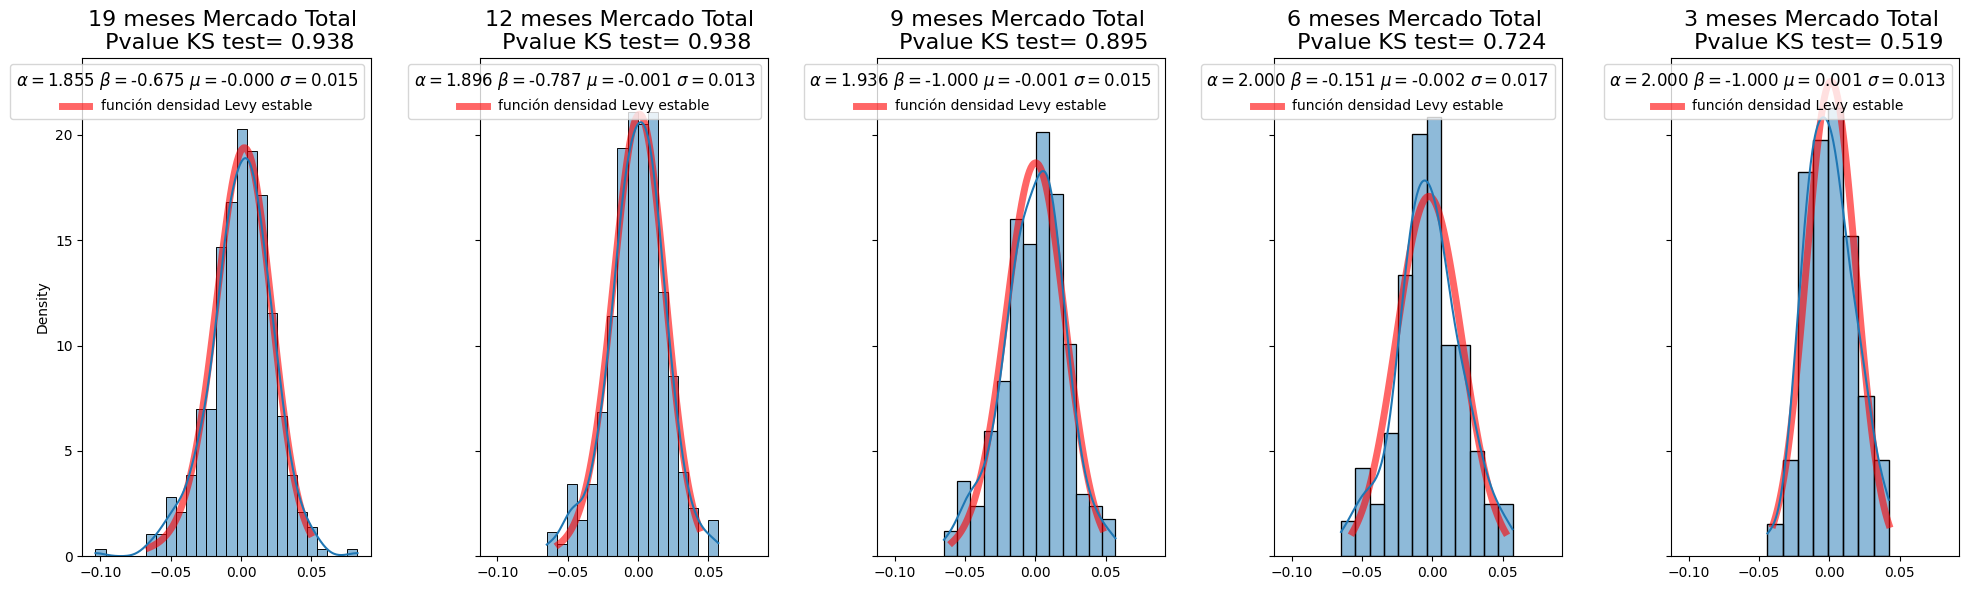

In [88]:

fig, ax = plt.subplots(1, 5, sharey=True, sharex=True)
fig.set_size_inches(20, 6)

#todo 19 meses hist
alpha, beta, loc, scale = alphat19, betat19, loct19, scalet19
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[0],data=y19m,stat = "density",kde=True)
ax[0].set_title(f"19 meses Mercado Total \n Pvalue KS test= {ktestt.pvalue:.3f}", fontsize=16)
ax[0].legend(title=fr"$\alpha=${alphat19:.3f} $\beta=${betat19:.3f} $\mu=${loct19:.3f} $\sigma=${scalet19:.3f}", title_fontsize = "12")

#todo 12 meses hist
alpha, beta, loc, scale = alphat12, betat12, loct12, scalet12
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[1],data=y12mt,stat = "density",kde=True)
ax[1].set_title(f"12 meses Mercado Total \n Pvalue KS test= {ktestt.pvalue:.3f}", fontsize=16)
ax[1].legend(title=fr"$\alpha=${alphat12:.3f} $\beta=${betat12:.3f} $\mu=${loct12:.3f} $\sigma=${scalet12:.3f}", title_fontsize = "12")

#todo 9 meses hist
alpha, beta, loc, scale = alphat9, betat9, loct9, scalet9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[2].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[2],data=y24s9,stat = "density",kde=True)
ax[2].set_title(f"9 meses Mercado Total \n Pvalue KS test= {ktestt9.pvalue:.3f}", fontsize=16)
ax[2].legend(title=fr"$\alpha=${alphat9:.3f} $\beta=${betat9:.3f} $\mu=${loct9:.3f} $\sigma=${scalet9:.3f}", title_fontsize = "12")

#todo 6 meses hist
alpha, beta, loc, scale = alphat6, betat6, loct6, scalet6
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[3].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[3],data=y24s6,stat = "density",kde=True)
ax[3].set_title(f"6 meses Mercado Total \n Pvalue KS test= {ktestt6.pvalue:.3f}", fontsize=16)
ax[3].legend(title=fr"$\alpha=${alphat6:.3f} $\beta=${betat6:.3f} $\mu=${loct6:.3f} $\sigma=${scalet6:.3f}", title_fontsize = "12")

#todo 3 meses histograma
alpha, beta, loc, scale = alphat3, betat3, loct3, scalet3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[4].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[4],data=y24s3,stat = "density",kde=True)
ax[4].set_title(f"3 meses Mercado Total \n Pvalue KS test= {ktestt3.pvalue:.3f}", fontsize=16)
ax[4].legend(title=fr"$\alpha=${alphat3:.3f} $\beta=${betat3:.3f} $\mu=${loct3:.3f} $\sigma=${scalet3:.3f}", title_fontsize = "12")




plt.tight_layout()

plt.savefig("imgs/Grafico_Ajuste_MT.pdf", format="pdf", bbox_inches='tight')

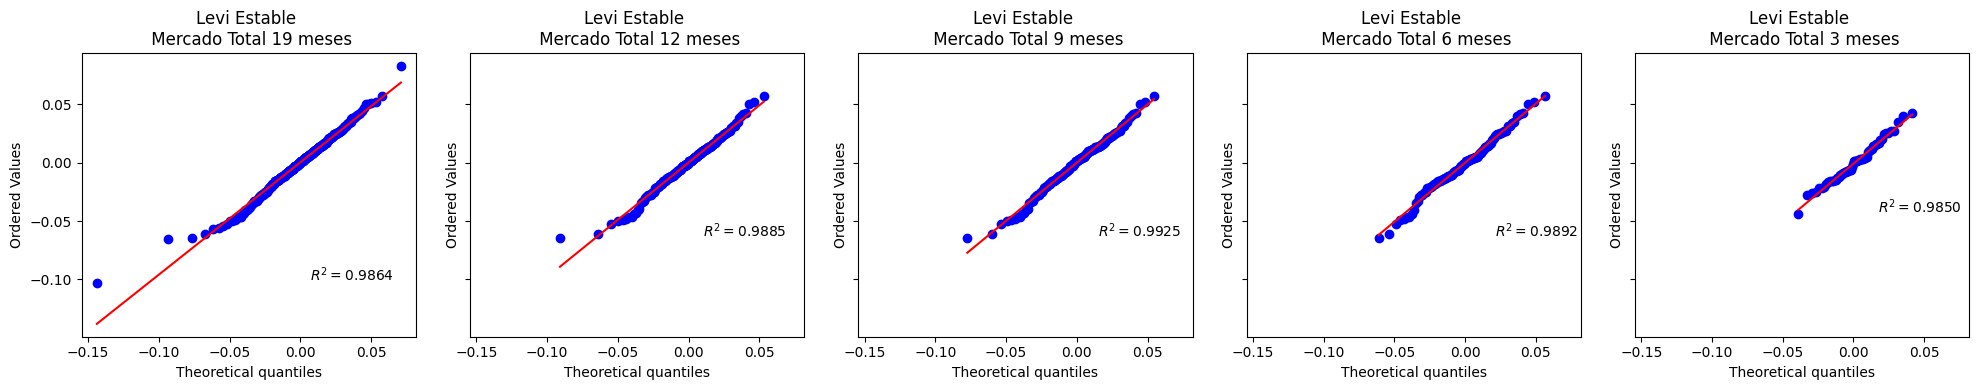

In [89]:
fig, axs = plt.subplots(1, 5, sharey=True, sharex=True, figsize=(10, 5))
fig.set_size_inches(20,4)


#todo 19 mestes qqplot
alpha, beta, loc, scale = alphat19, betat19, loct19, scalet19
stats.probplot(y19m,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[0])
axs[0].set_title(f"Levi Estable \n Mercado Total 19 meses")

#todo 12 mestes qqplot
alpha, beta, loc, scale = alphat12, betat12, loct12, scalet12
stats.probplot(y12mt,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[1])
axs[1].set_title(f"Levi Estable \n Mercado Total 12 meses")

#todo 9 meses qqplot
alpha, beta, loc, scale = alphat9, betat9, loct9, scalet9
stats.probplot(y24s9,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[2])
axs[2].set_title(f"Levi Estable \n Mercado Total 9 meses")

#todo 6 meses qqplot
alpha, beta, loc, scale = alphat6, betat6, loct6, scalet6
stats.probplot(y24s6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[3])
axs[3].set_title(f"Levi Estable \n Mercado Total 6 meses")

#todo 3 meses qq plot
alpha, beta, loc, scale = alphat3, betat3, loct3, scalet3
stats.probplot(y24s3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[4])
axs[4].set_title(f"Levi Estable \n Mercado Total 3 meses")

plt.tight_layout()

plt.savefig("imgs/Graficoqq_Ajuste_MT.pdf", format="pdf", bbox_inches='tight')

In [80]:
# Lista de todos los DataFrames de ajuste Normal creados
bases_normal = [
    df_resultados_norm19m, 
    df_resultados_norm12m, 
    df_resultados_norm9m, 
    df_resultados_norm6m, 
    df_resultados_norm3m
]

# Concatenamos todas las bases en una sola
df_normal_consolidado = pd.concat(bases_normal, ignore_index=True)

# Reordenamos las columnas para una mejor lectura
columnas_ordenadas = ['Horizonte temporal', 'Sector', 'Distribución', 'Loc (Mu)', 'Scale (Sigma)', 'KS Statistic', 'P-Value']
df_normal_consolidado = df_normal_consolidado[columnas_ordenadas]

# Visualizar el resultado final
df_normal_consolidado

,Horizonte temporal,Sector,Distribución,Loc (Mu),Scale (Sigma),KS Statistic,P-Value
0,19 meses,COME,Normal,0.000672,0.021041,0.047783,0.312104
1,19 meses,MOA,Normal,-0.000637,0.027218,0.083123,0.007585
2,19 meses,MOI,Normal,-0.001043,0.027391,0.100445,0.000588
3,19 meses,AGRO,Normal,-0.000030,0.022470,0.100445,0.000588
4,19 meses,ENE,Normal,0.001069,0.026789,0.045018,0.382474
5,19 meses,FIN,Normal,0.000871,0.038412,0.103803,0.000339
6,19 meses,TOTAL,Normal,0.000248,0.022423,0.049417,0.274969
7,12 meses,COME,Normal,-0.000236,0.016584,0.039203,0.831195
8,12 meses,MOA,Normal,-0.002417,0.025825,0.114945,0.002820
9,12 meses,MOI,Normal,-0.002368,0.029102,0.141465,0.000097


In [84]:
# 1. Unificamos los dos bloques consolidados
# df_normal_consolidado y df_levy_consolidado deben estar en memoria
df_final_comparativo = pd.concat([df_normal_consolidado, df_levy_consolidado], ignore_index=True)

# 2. Ordenamos para que sea fácil de leer (Horizonte -> Sector -> Distribución)
df_final_comparativo = df_final_comparativo.sort_values(
    by=['Horizonte temporal', 'Sector', 'Distribución'], 
    ascending=[False, True, True]
)

# 3. Creamos un resumen rápido del P-Value para comparar bondad de ajuste
df_resumen_pvalues = df_final_comparativo.pivot_table(
    index=['Horizonte temporal', 'Sector'], 
    columns='Distribución', 
    values='P-Value'
)

# 4. Exportación a Excel con múltiples pestañas
nombre_archivo = 'Resultados_Ajuste_Mercado_Financiero.xlsx'

with pd.ExcelWriter(nombre_archivo) as writer:
    df_final_comparativo.to_excel(writer, sheet_name='Datos Completos', index=False)
    df_resumen_pvalues.to_excel(writer, sheet_name='Comparativa P-Values')

print(f"Proceso completado. El archivo '{nombre_archivo}' ha sido generado.")

Proceso completado. El archivo 'Resultados_Ajuste_Mercado_Financiero.xlsx' ha sido generado.
